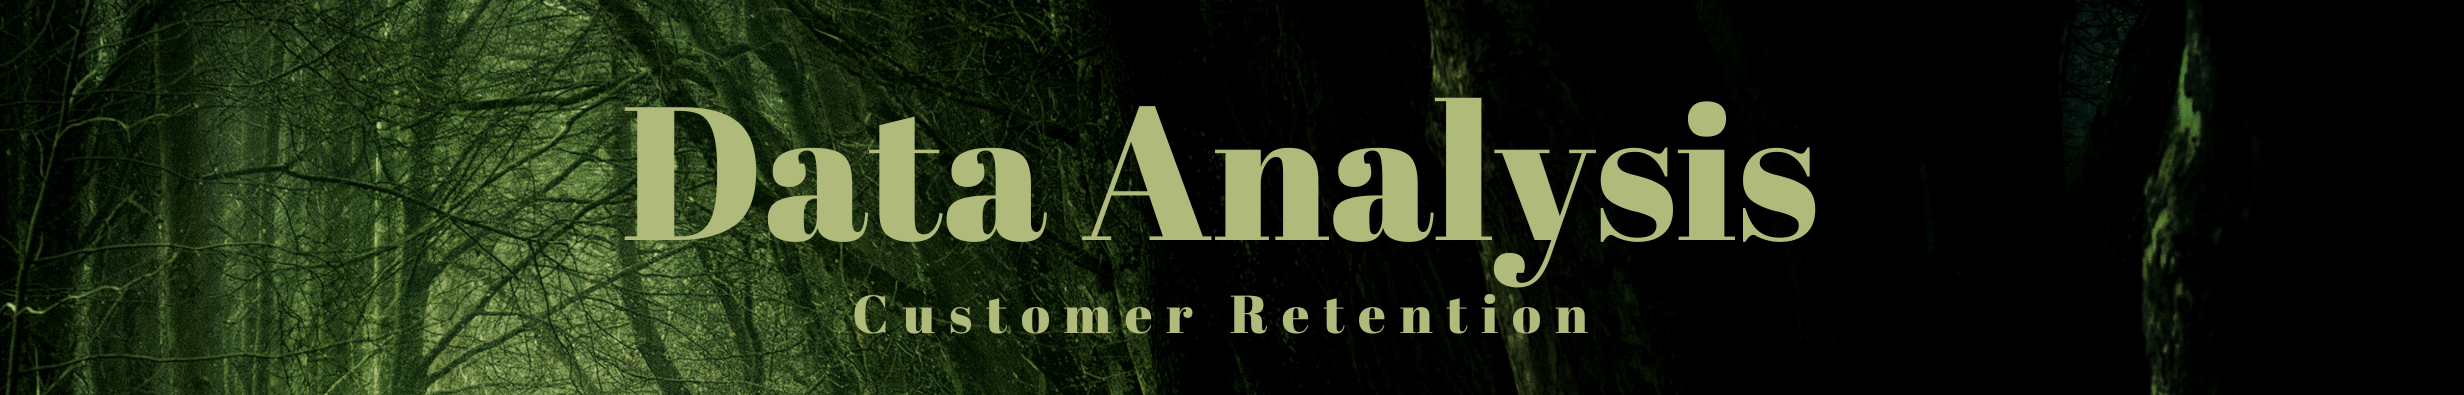

<div class="alert alert-block alert-success">
    <b> Table of Contents </b>
    
1. [Importing Libraries](#Libraries)
2. [Importing Data](#data)
3. [Data Cleaning](#data_cleaning)
4. [Data Visualization](#data_visualization)
    1. [Hedonistic Values](#hedonistic)
    2. [Hedonistic Values and Gender](#hedonistic_gender)
    3. [Utilitarian Values](#utilitarian_values)
    4. [Utilitarian Values and Gender](#utilitarian_gender)
    5. [Service Quality](#service_quality)
    6. [Miscellaneous](#miscellaneous)
    7. [Most Popular Online Stores (Visualizing)](#mpos_v)
    8. [Most Popular Online Stores (Scoring)](#mpos_s)
    9. [Most Unsatisfactory Online Stores (Visualizing)](#muos_v)
    10. [Most Unsatisfactory Online Stores (Scoring)](#muos_s)
5. [EDA Conclusion & Remarks](#conclusion)
6. [Feature Engineering](#fe)
7. [Model Building](#mb)
8. [Saving the Model](#save)

***
<div class="alert alert-block alert-info">
    <b>I. Importing Libraries </b>
    <a id='Libraries'></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

***

<div class="alert alert-block alert-info">
    <b>II. Importing Data </b>
    <a id='data'></a>

In [87]:
df = pd.read_excel("Customer_retention_dataset/customer_retention_dataset.xlsx")
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile Internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [88]:
# checking presence of any null values
df.isnull().sum().sum()

0

- ○ ☼ No null values are present. We can proceed with cleaning the data.

#### <strong><u>Methods used to clean the data:</u></strong>

1. __Renaming columns__
    - The column names are way too long and it would be easier if we replaced them with a short & concise name 
        - for easier understanding of the entire dataset
        - for easier visualizations
    - This dataframe will be used to determine the necessity of the `utilitarian` and `hedonistic` values which will inturn help us determine the ideal E-tailer.
        
        
2. __Splitting the dataframe into two parts__
    - First dataframe will contain all the columns from the start until Question 47: `"Getting value for money spent?"`.
    - Second dataframe will contain the remaining columns. 
        - this is because the second dataframe contains subjective questions like 
            - `"Quickness to complete purchase"`, `"Which of the Indian online retailer would you recommend to a friend?"` etc...
            - the answers to these questions change depending on the individual user's perception on the E-tailer.
            - Hence, this will be used to determine the best and the worst E-tailers according to the users.

***

<div class="alert alert-block alert-info">
<b>III. Data Cleaning </b>
    <a id='data_cleaning'></a>

#### _creating a new dataframe with the columns renamed to something more concise_

In [89]:
data = pd.DataFrame()
data['Gender'] = df['1Gender of respondent']
data['Age'] = df['2 How old are you? ']
data['City'] = df['3 Which city do you shop online from?']
data['Pincode'] = df['4 What is the Pin Code of where you shop online from?']
data['Purchases_Annually'] = df['6 How many times you have made an online purchase in the past 1 year?']
data['Internet_AccessPoint'] = df['7 How do you access the internet while shopping on-line?']
data['Device'] = df['8 Which device do you use to access the online shopping?']
data['Screen_Size'] = df['9 What is the screen size of your mobile device?\t\t']
data['OS'] = df['10 What is the operating system (OS) of your device?\t\t\t\t                                          ']
data['Browser'] = df['11 What browser do you run on your device to access the website?\t\t\t                                                          ']
data['Introduction_To_Online_Store'] = df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ']
data['Mode_Of_Access'] = df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ']
data['Decision_Time'] = df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ']
data['Preferred_Payment_Method'] = df['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ']
data['Frequency_of_Abandoning_Carts'] = df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ']
data['Easy_To_Understand'] = df['18 The content on the website must be easy to read and understand']
data['Info_On_Similar_Product'] = df['19 Information on similar product to the one highlighted  is important for product comparison']
data['Complete_Seller_and_Product_Info'] = df['20 Complete information on listed seller and product being offered is important for purchase decision.']
data['Clear_Relevant_Info'] = df['21 All relevant information on listed products must be stated clearly']
data['Ease_Of_Navigation'] = df['22 Ease of navigation in website']
data['Loading_Speed_Q'] = df['23 Loading and processing speed']
data['Friendly_UI'] = df['24 User friendly Interface of the website']
data['Convenient_Payment_Methods'] = df['25 Convenient Payment methods']
data['Order_Fulfilment_Trust'] = df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time']
data['Empathy'] = df['27 Empathy (readiness to assist with queries) towards the customers']
data['Privacy_Q'] = df['28 Being able to guarantee the privacy of the customer']
data['Responsiveness'] = df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)']
data['Discounts'] = df['30 Online shopping gives monetary benefit and discounts']
data['Enjoyment'] = df['31 Enjoyment is derived from shopping online']
data['Convenience'] = df['32 Shopping online is convenient and flexible']
data['Return_Replacement_Availability'] = df['33 Return and replacement policy of the e-tailer is important for purchase decision']
data['Loyalty_Programs_Access'] = df['34 Gaining access to loyalty programs is a benefit of shopping online']
data['Quality_Information'] = df['35 Displaying quality Information on the website improves satisfaction of customers']
data['Satisfaction_On_Good_UI/UX'] = df['36 User derive satisfaction while shopping on a good quality website or application']
data['Net_Benefit'] = df['37 Net Benefit derived from shopping online can lead to users satisfaction']
data['User_Satisfaction and Trust'] = df['38 User satisfaction cannot exist without trust']
data['Variety'] = df['39 Offering a wide variety of listed product in several category']
data['Complete_Product_Info_Q'] = df['40 Provision of complete and relevant product information']
data['Savings'] = df['41 Monetary savings']
data['Patronizing'] = df['42 The Convenience of patronizing the online retailer']
data['Adventure'] = df['43 Shopping on the website gives you the sense of adventure']
data['EShopping_Enhances_Social_Status'] = df['44 Shopping on your preferred e-tailer enhances your social status']
data['Gratification_Shopping'] = df['45 You feel gratification shopping on your favorite e-tailer']
data['Shopping_Fulfills_Roles'] = df['46 Shopping on the website helps you fulfill certain roles']
data['Value_For_Money_Spent'] = df['47 Getting value for money spent']

In [90]:
df_comp = pd.DataFrame()
df_comp['All_Online_Retailers'] = df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ']
df_comp["Easy_To_Use"] = df['Easy to use website or application']
df_comp["Visually_Appealing"] = df['Visual appealing web-page layout'] 
df_comp["Variety_Of_Products"] = df['Wild variety of product on offer']
df_comp["Complete_Product_Info"] = df['Complete, relevant description information of products']
df_comp["Loading_Speed"] = df['Fast loading website speed of website and application']
df_comp["Reliability"] = df['Reliability of the website or application']
df_comp["Trasaction_Speed"] = df['Quickness to complete purchase']
df_comp["Availability_Of_Payment_Options"] = df['Availability of several payment options'] 
df_comp["Fast_Delivery"] = df['Speedy order delivery ']
df_comp["Privacy"] = df['Privacy of customers’ information']
df_comp["Security"] = df['Security of customer financial information']
df_comp["Trust"] = df['Perceived Trustworthiness']
df_comp["Online_Assistance"] = df['Presence of online assistance through multi-channel']
df_comp["Longer_LogIn"] = df['Longer time to get logged in (promotion, sales period)']
df_comp["Longer_Display_Photos"] = df['Longer time in displaying graphics and photos (promotion, sales period)']
df_comp["Late_Price_Declaration"] = df['Late declaration of price (promotion, sales period)']
df_comp["Longer_Loading_Time"] = df['Longer page loading time (promotion, sales period)']
df_comp["Limited_Payment"] = df['Limited mode of payment on most products (promotion, sales period)']
df_comp["Longer_Delivery"] = df['Longer delivery period'] 
df_comp["Change_in_UI"] = df['Change in website/Application design']
df_comp["Page_Disruptions"] = df['Frequent disruption when moving from one page to another']
df_comp["Efficient"] = df['Website is as efficient as before']
df_comp["Recommendation"] = df['Which of the Indian online retailer would you recommend to a friend?']

***
<div class="alert alert-box alert-info">
    <b>IV. Data Visualization <b>
    <a id='data_visualization'></a>

> <div class='alert alert-box alert-warning'>
    <b>IV(a). <i>Hedonistic Values <b><i>
    <a id='hedonistic'></a>

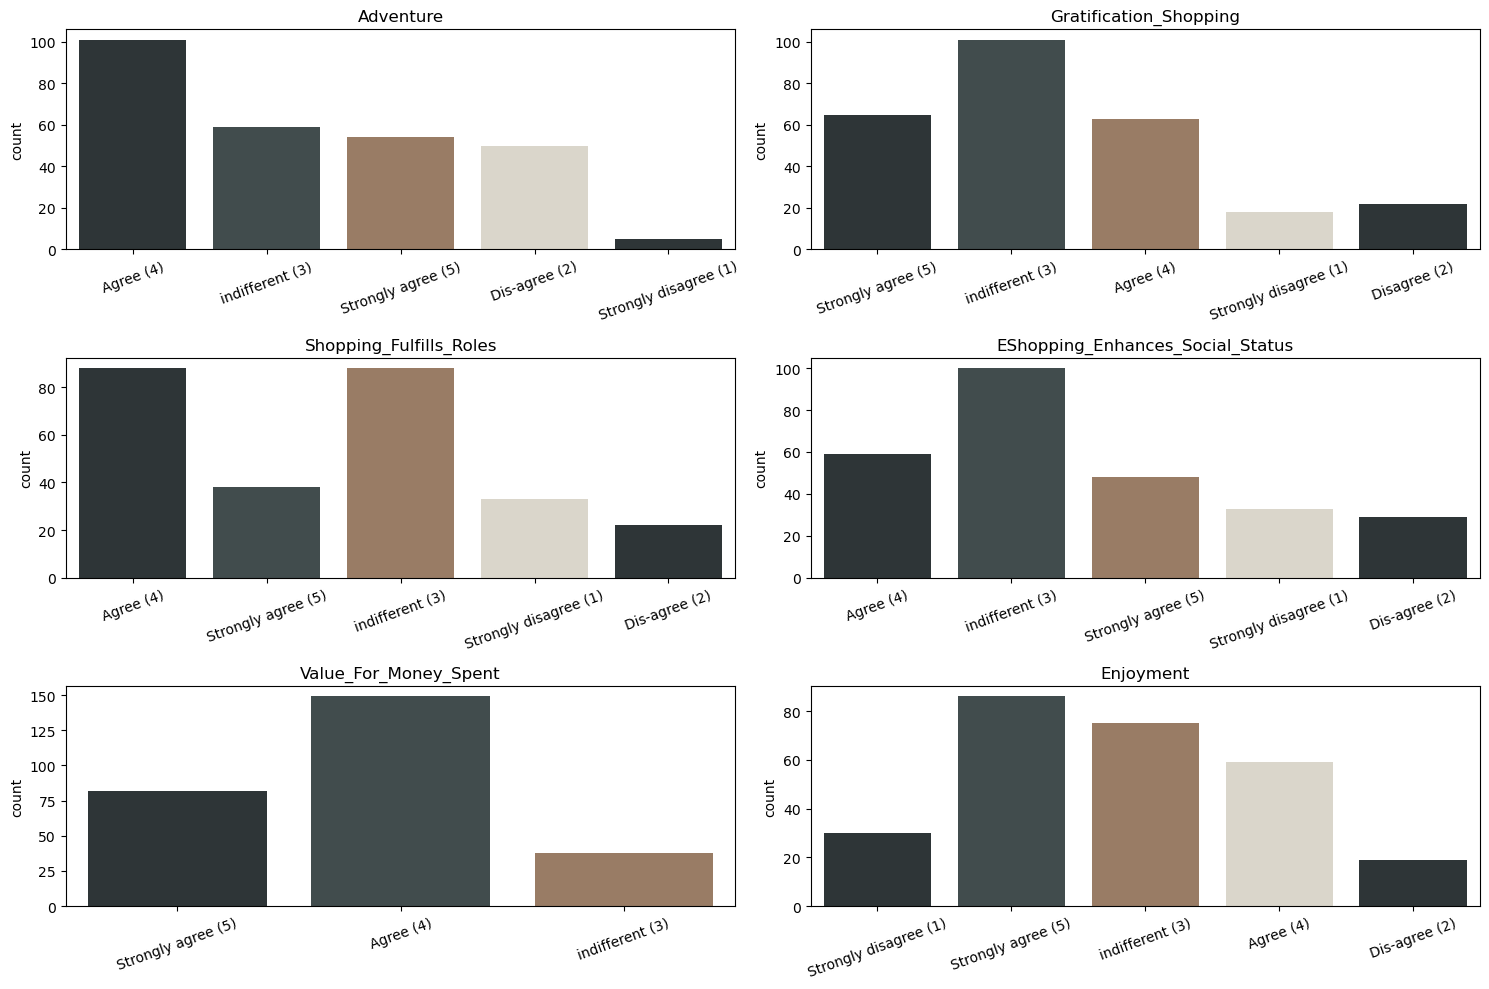

In [91]:
Hedonistic_columns = ['Adventure','Gratification_Shopping','Shopping_Fulfills_Roles','EShopping_Enhances_Social_Status',
           'Value_For_Money_Spent','Enjoyment']
nrows = 3
ncols = 2

plt.figure(figsize=(15,10))
for i in range(0,len(Hedonistic_columns)):
    plt.subplot(nrows,ncols,i+1)
    sns.countplot(x=Hedonistic_columns[i],data=data,palette=['#2C3639','#3F4E4F','#A27B5C','#DCD7C9'])
    plt.title(Hedonistic_columns[i])
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.tight_layout()

__Are Hedonistic values necessary to drive more sales?__
1. Adventure: _Majority of the users(100+) __agree__ that they feel a sense of adventure while shopping online._
2. Gratificaiton: _Majority of the users believe that the sense of gratification __does not play a role__ in their purchase decision._
3. Shopping_Fulfills_Roles: _There appears to be a conflict between those who __agree__ and those who are __indifferent__ to their roles being fulfilled through shopping._
4. EShopping_Enhances_Social_Status: _Users find their social statuses to be __indifferent__ when it comes to E-shopping_. 
5. Value_For_Money_Spent: _Majority of the users(140+) __agree__ that they get value out of the money they spend on online shopping._
6. Enjoyment: _Majority of the users(80+) __Strongly agree__ that they derive a sense of enjoyment from shopping online._

From the above plots and explanations we can see that factors like `Adventure`, `Enjoyment` and `Value for Money Spent` do play a role for driving the sales. However, factors like  `Gratification`,`Shopping Fulfills Roles` and `EShopping Enhances Social Status`, seem to be indifferent when it comes to the sales outlook of brands.

> <div class='alert alert-box alert-warning'>
    <b> IV(b). <i>Hedonistic Values and Gender <b><i>
    <a id='hedonistic_gender'></a>

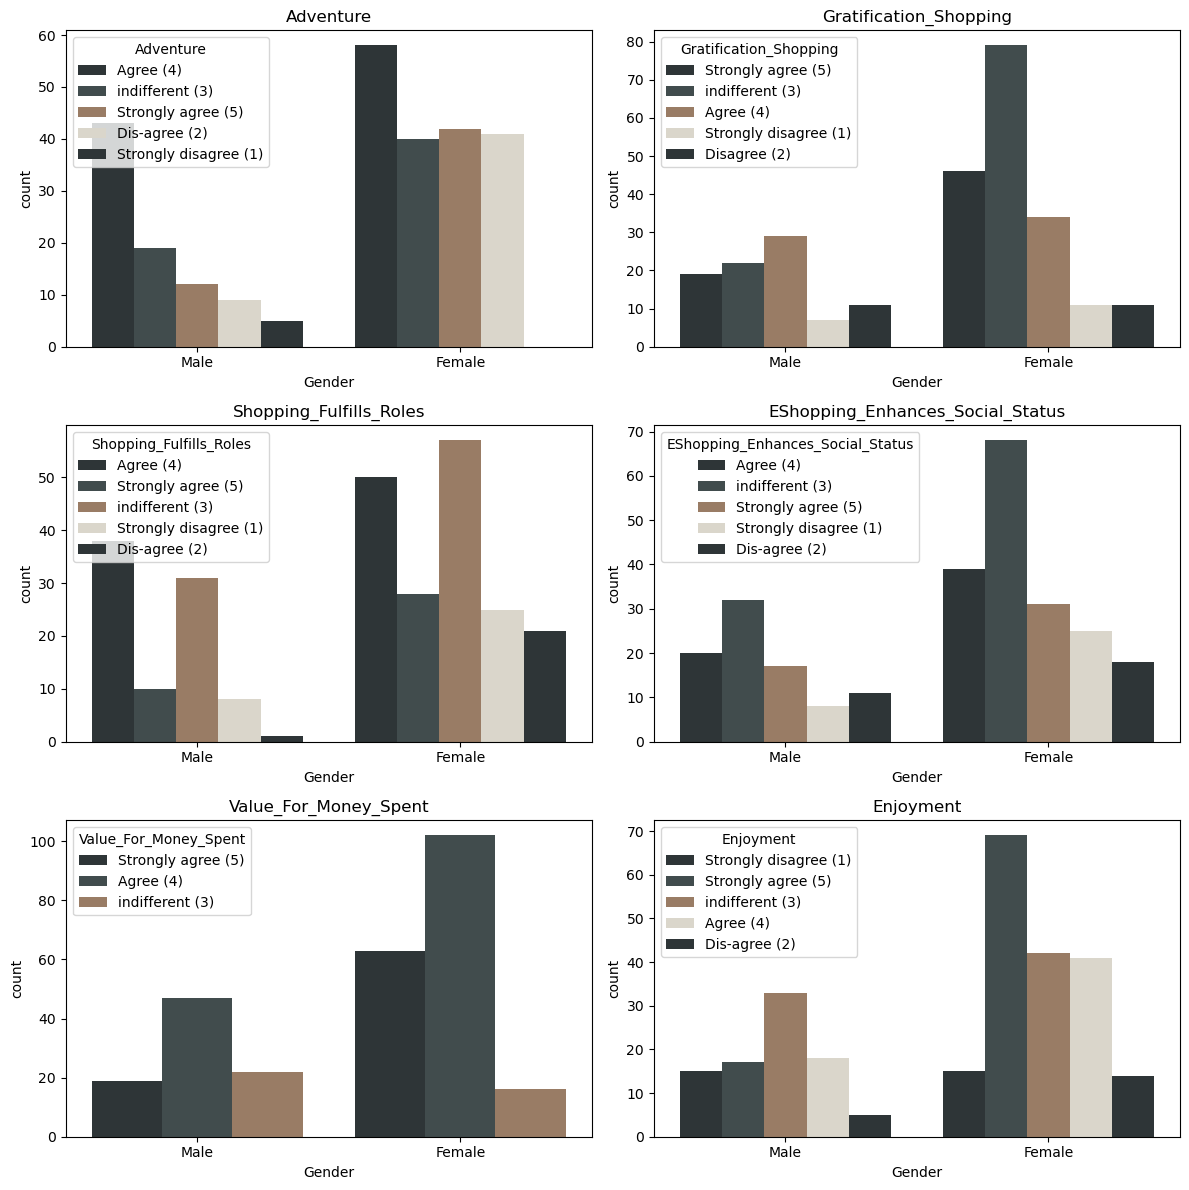

In [92]:
Hedonistic_columns = ['Adventure','Gratification_Shopping','Shopping_Fulfills_Roles','EShopping_Enhances_Social_Status',
           'Value_For_Money_Spent','Enjoyment']
nrows = 3
ncols = 2

plt.figure(figsize=(12,12))
for i in range(0,len(Hedonistic_columns)):
    plt.subplot(nrows,ncols,i+1)
    sns.countplot(x='Gender',hue=Hedonistic_columns[i],data=data,palette=['#2C3639','#3F4E4F','#A27B5C','#DCD7C9'])
    plt.title(Hedonistic_columns[i])
    plt.tight_layout()

__Do the hedonistic values differ in terms of gender?__
1. Adventure: _Both Males and Females __agree__ that they feel a sense of adventure while shopping online._
2. Gratification Shopping: _Females find the sense of gratification to be __indifferent__ while shopping online. Whereas, Males __agree__ that they feel a sense of gratifiaction while E-shopping._
3. Shopping Fulfills Roles:
 - a. _In females there seems to be a clash between __agree__ and __indifferent__ with the majority leaning towards __indifferent__._
 - b. _In males there also is a clash between __agree__ and __indifferent__, but with the majority leaning towards __agree__._
4. EShopping_Enchances_Social_Status: _Majority of both the genders find their social statuses to be __indifferent__ before and after E-shopping, But following that the genders do __agree__ that E-shopping enhances their social status._
5. Value_For_Money_Spent: _Both the genders __agree__ that they are getting the value out of the money spent._
6. Enjoyment: _Females feel the sense of Enjoyment more than Males do_

In conclusion, __Yes__, the hedonistic values differ in terms of gender. This difference/clash can mostly be seen in:

- `Gratification`: where majority of females choose __indifferent__ and majority of the males __agree__.
- `Shopping Fulfills Roles`: where also majority of females choose __indifferent__ and majority of the males __agree__.
- `EShopping Enhances Social Status`: where both the genders find it __indifferent__
- `Enjoyment`: where majority of the females choose __strongly agree__ and majority of the males chose __indifferent__.

> <div class='alert alert-box alert-warning'>
    <b> IV(c). <i>Utilitarian Values <b><i>
    <a id='utilitarian_values'></a>

ValueError: Could not interpret input 'Complete_Product_Info'

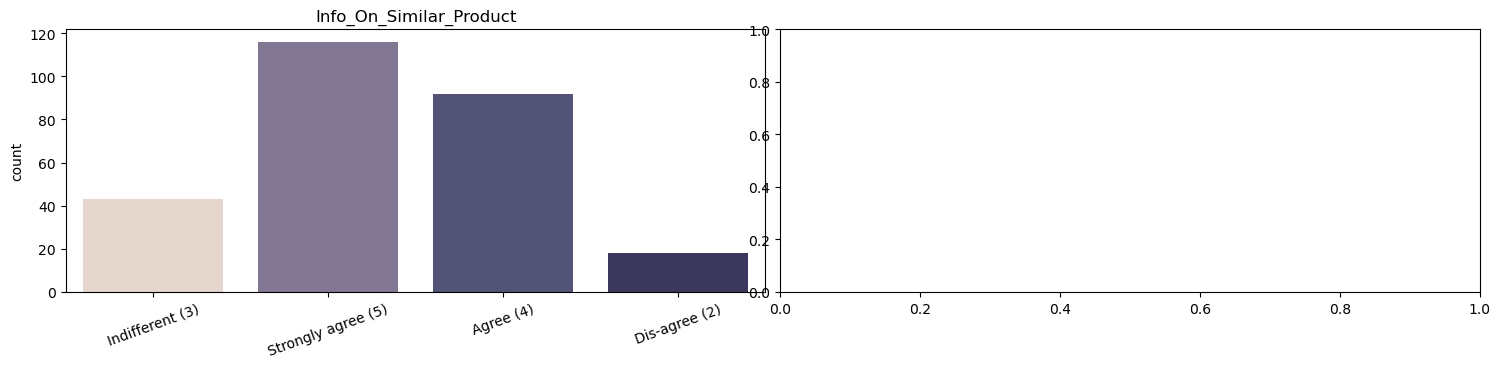

In [93]:
Utilitarian_columns = ['Info_On_Similar_Product','Complete_Product_Info','Convenience','Value_For_Money_Spent','Discounts','Savings']
nrows = 3
ncols = 2

plt.figure(figsize=(15,10))
for i in range(0,len(Utilitarian_columns)):
    plt.subplot(nrows,ncols,i+1)
    sns.countplot(x=Utilitarian_columns[i],data=data,palette=['#E9D5CA','#827397','#4D4C7D','#363062'])
    plt.title(Utilitarian_columns[i])
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.tight_layout()

__Are Utilitarian values necessary to drive more sales?__
1. Info_On_Similar_Products: _Majority of the users(100+) __strongly agree__ that information of similar products are important for them to make a purchase decision._
2. Complete_Product_Info: _Majority of the users(120+) __strongly agree__ that complete product information is important for them to make a purchase decision._
3. Convenience: _Convenience also plays a huge role in users making a purchase decision as observed in the plot (140+ users __strongly agree__)_
4. Discounts and Monetary Savings: _Also play a vital role in driving the sales as seen in the plots above._

    Discounts => 170+ users agree ||
    Monetary Savings => 190+ users agree

From the above plots and explanations we can see that factors like `Complete Product Information`, `Monetary Savings`,`Discounts`, `Value for Money Spent`, `Information on Similar Products` and `Convenience` are imperative for making sales. Hence, we can say that utilitarian values are necessary.

> <div class='alert alert-box alert-warning'>
    <b><i> IV(d). Utilitarian Values and Gender<b><i>
    <a id='utilitarian_gender'></a>

In [ ]:
Utilitarian_columns = ['Info_On_Similar_Product','Complete_Product_Info','Convenience','Value_For_Money_Spent','Discounts','Savings']
nrows = 3
ncols = 2

plt.figure(figsize=(15,10))
for i in range(0,len(Utilitarian_columns)):
    plt.subplot(nrows,ncols,i+1)
    sns.countplot(x='Gender',hue=Utilitarian_columns[i],data=data,palette=['#E9D5CA','#827397','#4D4C7D','#363062','#5F7161'])
    plt.title(Utilitarian_columns[i])
    plt.tight_layout()

__Do Utilitarian values differ in terms of gender?__

No, there is no difference when it comes to the utilitarian values between the genders. There seems to be a mutual consensus in the following factors,
`Complete Product Information`, `Monetary Savings`,`Discounts`, `Value for Money Spent`, `Information on Similar Products` and `Convenience`.

> <div class='alert alert-box alert-success'>
    <b>IV(e).<i> Service Quality <i><b>
    <a id='service_quality'></a>

In [ ]:
service_quality = ['Empathy','Privacy','Responsiveness','Return_Replacement_Availability','Quality_Information','Ease_Of_Navigation',
 'Easy_To_Understand','Friendly_UI','Order_Fulfilment_Trust','Satisfaction_On_Good_UI/UX']
nrows = 5
ncols = 2

plt.figure(figsize=(12,17))
for i in range(0,len(service_quality)):
    plt.subplot(nrows,ncols,i+1)
    sns.countplot(x=service_quality[i],data=data,palette=['#1C6758','#3D8361','#D6CDA4','#EEF2E6'])
    plt.title(service_quality[i])
    plt.xticks(rotation='20')
    plt.xlabel('')
    plt.tight_layout()

__Does service quality matter?__ 

As seen in the plots above, there seems to be a general consensus with regards to `Empathy`, `Privacy`, `Responsiveness`, `Return_Replacement_Availability`, `Quality_Information`, `Ease_Of_Navigation`, `Easy_To_Understand`, `Friendly_UI`, `Order_Fulfilment_Trust`, `Satisfaction_On_Good_UI/UX` and these are all service qualities that are important to drive more sales and to increase customer retention.

> <div class='alert alert-box alert-success'>
    <b>IV(f).<i> Miscellaneous<b><i>
    <a id='miscellaneous'></a>

In [ ]:
# changing the error '41-50 yaers' to '41-50 years'
data['Age'].replace('41-50 yaers','41-50 years',inplace=True)

In [ ]:
# plot to check the proportion of each values in the first 6 columns
collist = ['Gender', 'Age', 'City','Purchases_Annually','Internet_AccessPoint', 'Device', 'Screen_Size', 'OS', 'Browser',
       'Introduction_To_Online_Store', 'Mode_Of_Access', 'Decision_Time','Preferred_Payment_Method', 
           'Frequency_of_Abandoning_Carts']
nrows = 7
ncols = 2

plt.figure(figsize=(25,50))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    plt.pie(data[collist[i]].value_counts(),autopct='%1.1f%%',labels=data[collist[i]].unique(),
            colors=[('#73A9AD'),('#C4DFAA'),('#90C8AC'),('#B4C6A6'),('#CCD6A6'),('#B7C4CF'),('#EEE3CB'),('#D7C0AE'),
                   ('#967E76'),('#E8DFCA'),('#F5EFE6')])
    centre=plt.Circle((0,0),0.7,fc='white')
    plt.gca().add_artist(centre)
    plt.xlabel(collist[i]) 

1. __Gender__: Survey had `Males (67.3%)` and `Females (32.7%)`.
2. __Age__: Survey had `31-40 years(30.1%)`, `21-30 years(29.4%)`, `41-50 years(26%)`, `Less than 20 years(7.4%)`, and `51 years and above(7.1%)`.
3. __City__: Percentages of people from `Delhi (21.6%)`, `Greater Noida (16.0%)`, `Karnal (14.9%)`, `Bangalore (13.8%)`, `Noida (10.0%)`, `Solan (6.7%)`, `Moradabad (6.7%)`, `Gurgaon (4.5%)`, `Merrut (3.3%)`, `Ghaziabad (1.9%)`, `Bulandshahr (0.7%)`.
4. __Purchases_Annually__: `31-40 times (42.4%)`, `41 times and above (23.4%)`, `Less than 10 times (19.7%)`,`11-20 times (10.8%)`, `21-30 times (3.7%)`.
5. __Internet_AccessPoint__: `Dial-up (70.3%)`, `Wi-Fi (28.3%)`, `Mobile Internet (1.5%)`
6. __Device__: `Desktop (52.4%)`, `Smartphone (32.0%)`, `Tablet (11.2%)`, `Laptop (4.5%)`
7. __Screen_Size__: `Others (49.8%)`, `4.7 inches (36.8%)`, `5.5 inches (10.8%)`, `5 inches (2.6%)`
8. __OS__: `Window/windows Mobile (45.4%)`, `IOS/Mac (31.6%)`, `Android (23.0%)`
9. __Browser__: `Google chrome (80.3%)`, `Safari (14.9%)`, `Opera (3.0%)`, `Mozilla Firefox (1.9%)`
10. __Introduction_To_Online_Store__: `Search Engine (85.5%)`, `Content Marketing (7.4%)`, `Display Adverts (7.1%)`
11. __Mode_Of_Access__: `Search Engine (32.3%)`, `Via application (32.0%)`, `Direct URL (26.0%)`, `E-mail (6.7%)`,
       `Social Media (3.0%)`
12. __Decision_Time__:`6-10 mins (45.7%)`, `more than 15 mins (26.4%)`, `11-15 mins (17.1%)`, `1-5 mins (5.6%)`, `Less than 1 min (5.2%)`
13. __Preferred_Payment_Method__: `E-wallets (Paytm, Freecharge etc.) (55.0%)`, `Credit/Debit cards (28.3%)`, `Cash on delivery (CoD) (16.7%)`
14. __Frequency_of_Abandoning_Carts__: `Sometimes (63.6%)`, `Very frequently (17.8%)`, `Never (13.0%)`, `Frequently (5.6%)`

In [ ]:
# plot to observe differences in 'decision time' with respect to the 'Gender'
sns.countplot(x='Gender',hue='Decision_Time',data=data,palette=['#AD8B73','#CEAB93','#E3CAA5','#FFFBE9'])
plt.show()

__Does the descision time differ between the two genders?__
- Yes, the __decision taking time__ is more in the Female demographic, with more than 80 females taking __more than 15 minutes__ to make a purchase decision and majority of the Males take __6-10 minutes__ to make a purchase decision.

In [ ]:
# plot to check if decision time affects the purchases annually
plt.figure(figsize=(10,5))
sns.lineplot(x='Decision_Time',y='Purchases_Annually',hue='Gender',data=data, palette=('#7895B2','#C689C6'))
plt.yticks(data['Purchases_Annually'].unique())
plt.show()

__Does the decision time influence the purchases the users make?__
- Yes, we can see that there is an increase in the number of purchases when the decision time is __1-5 mins and 6-10 mins__.
- Most males take __1-5 mins__ to make a purchase decision and majority of the Females take __6-10 mins__.
- We can see some Males also take __less than 1 min__ to make a purchase decision, However, they make purchases upto 21-30 times a year.

In [ ]:
# changing the error '42 times and above' to '41 times and above'
data['Purchases_Annually'].replace('42 times and above','41 times and above',inplace=True)

In [ ]:
# plot to check the number of purchases made annually with regards to the feeling of 'Adventure'
plt.figure(figsize=(9,6))
sns.countplot(x='Adventure',hue='Purchases_Annually',data=data,palette=['#E5DCC3','#C7BEA2','#AAA492','#9A9483','#AD8B73'])
plt.show()

__Does the sense of Adventure affect the number of purchases users make annually?__
- People who chose `Strongly Agree`, `Agree`, `indifferent` when it comes to shopping giving them a sense of adventures are the ones who make the most purchases online. So __yes__, one of the elements that influences a person to shop online more frequently is the sense of adventure. (as seen earlier in the `Hedonistic Values` section)

In [ ]:
# plot to check the preferred payment method with respect to the OS
plt.figure(figsize=(10,5))
sns.lineplot(x='Preferred_Payment_Method',y='OS',hue='Gender',data=data,palette=['#827397','#F24A72'])
plt.yticks(data['OS'].unique())
plt.show()

__Which mode of payment and OS is more popular amongst the users?__
- `Credit/Debit cards` and `Window/windows Mobile` are popular amongst __Females__.
- `E-wallets (Paytm, Freecharge etc.)` and `IOS/Mac` are more popular amongst __Males__. 

In [ ]:
# plot to check if 'loading Speed' affects the number of 'Purchases Annually' with respect to the 'Gender'
plt.figure(figsize=(10,5))
sns.lineplot(x='Loading_Speed',y='Purchases_Annually',hue='Gender',data=data,palette=['#231955','#F05454'])
plt.yticks(data['Purchases_Annually'].unique())
plt.show()
data['Loading_Speed'].value_counts()

__Does loading speed affect the number of purchases users make annually?__
- We can see that both genders who 'Disagree' have the most amount of purchases annually.
- However, looking at this plot generally shows that users who agree that loading speed affects the purchase decision have less annual purchases compared to those who disagree.
- Since the users who agree that loading speed affects the purchase decision are more in number (227 both strongly agree & agree), __we can safely say that loading speed does affect the number of purchases made annually.__

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(x="Device", hue="Purchases_Annually", data=data, kind='count',palette=['#94B49F','#DAE2B6','#DFE8CC','#F7EDDB','#CCD6A6'])
plt.show()

__Which device is used to make the most purchases annually?__
1. `Smartphone` tops the list with 35+ users using smartphones to make 41+ purchases annually and 60+ users using smartphone to make less than 10 purchases online.
2. Next on the list is a `Laptop`, with more than 10 users using a laptop to make 31-40 purchases annually, followed by 10+ users making 11-20 purchases annually.
3. `Desktop` comes third with 10+ users making 31-40 purchases annually, followed by more than 7 users using a desktop to make less than 10 purchases annually.

> <div class="alert alert-box alert-success">
    <b>IV(g). <i>Most Popular Online Stores (Visualizing)<b><i>
    <a id='mpos_v'></a>

In [56]:
# creating a user deined function to count the number of times a store was mentioned in a column

def count_col_data(dataframe,col_name):
#   adding elements rom the dataframe to the list
    list_name = []
    for i in dataframe[col_name]:
        list_name.append(i.split(','))
        
#     if a row contains more than 1 company name, the following code opens the nested list and enters the string into a new list
    additional_list_name = []
    for element in list_name:
        if type(element) == list:
            additional_list_name.extend(element)
        else:
            additional_list_name.append(element)
            
#     takes all the values from the previous list and removes spaces if any and then enters it into the final list
    final_list = []
    for i in additional_list_name:
        final_list.append(str(i.strip(' ')))
        
#     the following code gets the count of all the variables present in the column and enters it into a dictionary
    array_1 = np.unique(final_list, return_counts=True)[0].tolist()
    array_2 = np.unique(final_list, return_counts=True)[1].tolist()  
    
    variable_count = {}
    for key in array_1:
        for value in array_2:
            variable_count[key] = value
            array_2.remove(value)
            break
            
#     the following code plots the recieved data and returns the count
    plt.figure(figsize=(10,4))
    plt.bar(variable_count.keys(),variable_count.values(),color=[('#80558C'),('#AF7AB3'),('#CBA0AE'),('#E6D2AA')])
    plt.show()
    return variable_count

__Which website do most users use?__

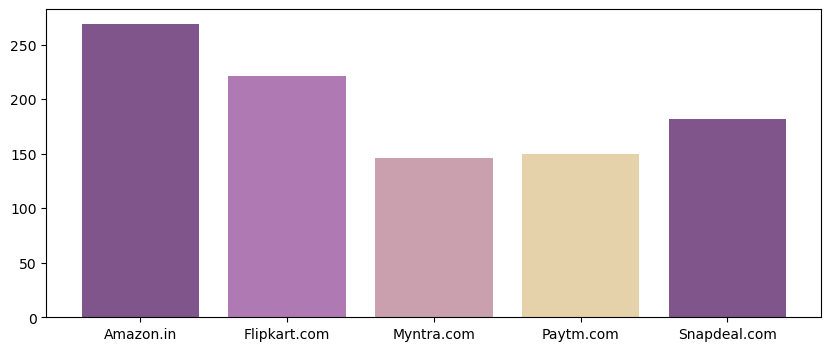

{'Amazon.in': 269,
 'Flipkart.com': 221,
 'Myntra.com': 146,
 'Paytm.com': 150,
 'Snapdeal.com': 182}

In [57]:
count_col_data(df_comp,'All_Online_Retailers')

__Which website do most users find Visually Appealing?__

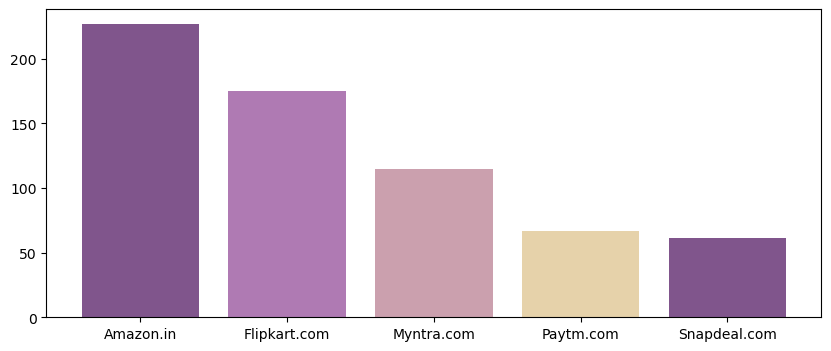

{'Amazon.in': 227,
 'Flipkart.com': 175,
 'Myntra.com': 115,
 'Paytm.com': 67,
 'Snapdeal.com': 61}

In [58]:
count_col_data(df_comp,'Visually_Appealing')

__Which website do most users find Easy to use?__

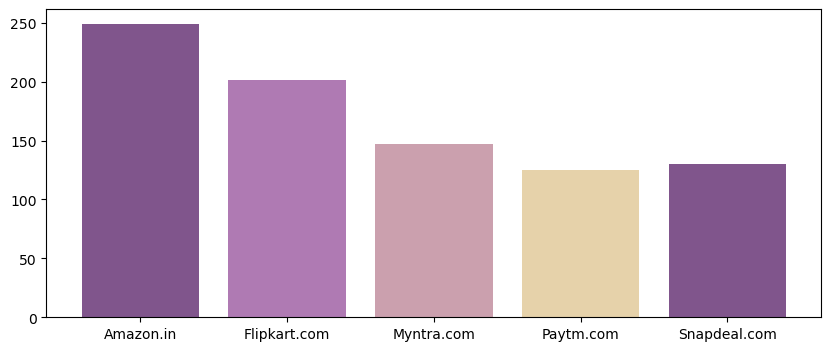

{'Amazon.in': 249,
 'Flipkart.com': 201,
 'Myntra.com': 147,
 'Paytm.com': 125,
 'Snapdeal.com': 130}

In [59]:
count_col_data(df_comp,'Easy_To_Use')

__Which website do most users find Reliable?__

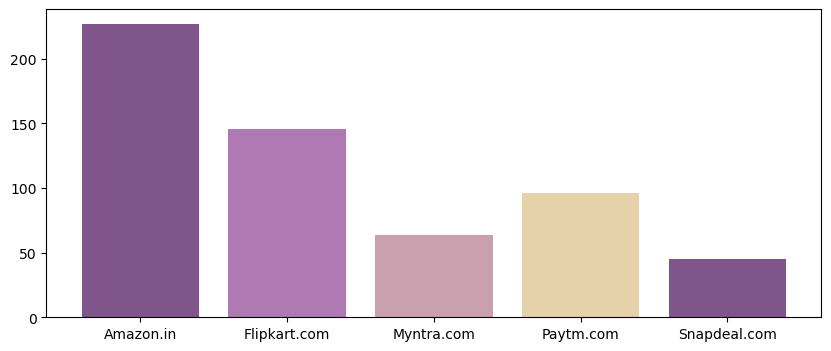

{'Amazon.in': 227,
 'Flipkart.com': 146,
 'Myntra.com': 64,
 'Paytm.com': 96,
 'Snapdeal.com': 45}

In [60]:
count_col_data(df_comp,'Reliability')

__Which website according to the users has more Variety of products?__

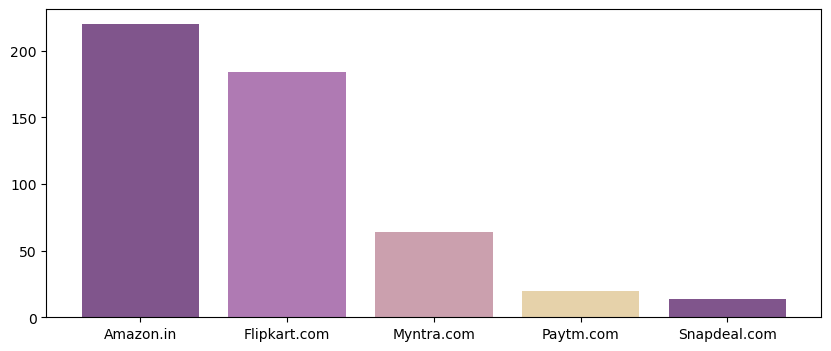

{'Amazon.in': 220,
 'Flipkart.com': 184,
 'Myntra.com': 64,
 'Paytm.com': 20,
 'Snapdeal.com': 14}

In [61]:
count_col_data(df_comp,'Variety_Of_Products')

__Which website according to the users has the complete product information?__

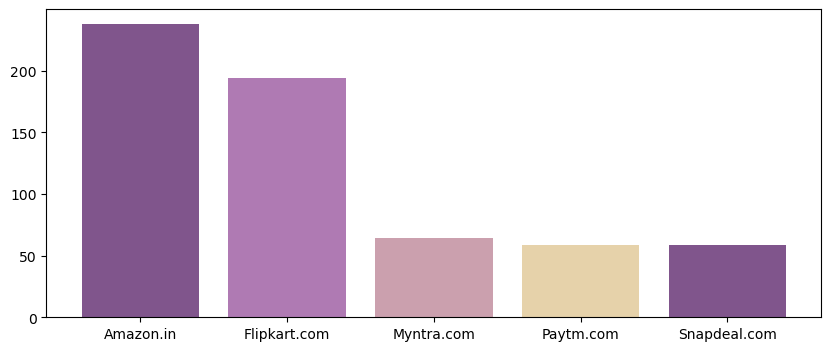

{'Amazon.in': 238,
 'Flipkart.com': 194,
 'Myntra.com': 64,
 'Paytm.com': 59,
 'Snapdeal.com': 59}

In [62]:
count_col_data(df_comp,'Complete_Product_Info')

__Which website according to the users has the fastest loading speed?__

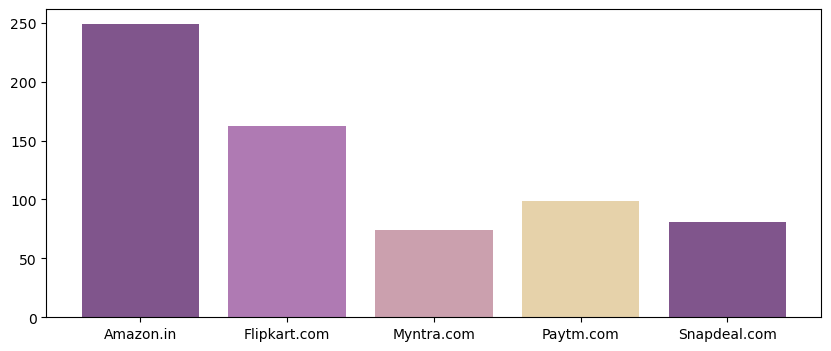

{'Amazon.in': 249,
 'Flipkart.com': 162,
 'Myntra.com': 74,
 'Paytm.com': 99,
 'Snapdeal.com': 81}

In [63]:
count_col_data(df_comp,'Loading_Speed')

__Which website according to the users is Reliable?__

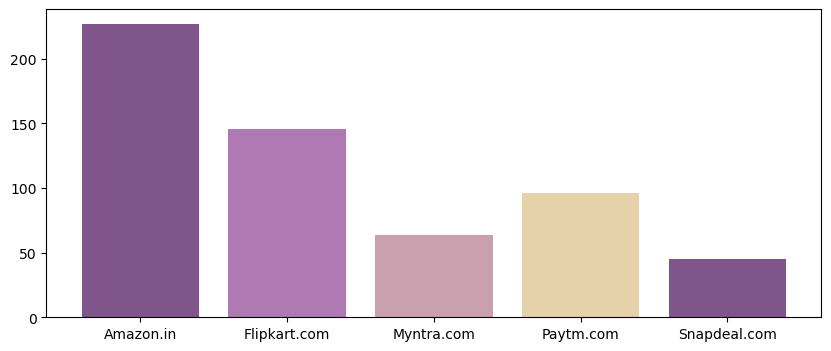

{'Amazon.in': 227,
 'Flipkart.com': 146,
 'Myntra.com': 64,
 'Paytm.com': 96,
 'Snapdeal.com': 45}

In [64]:
count_col_data(df_comp,'Reliability')

__Which website according to the users has the fastest Transaction Speed?__

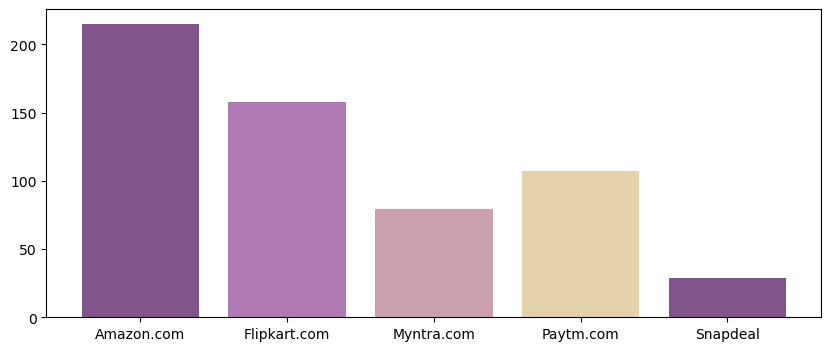

{'Amazon.com': 215,
 'Flipkart.com': 158,
 'Myntra.com': 79,
 'Paytm.com': 107,
 'Snapdeal': 29}

In [65]:
count_col_data(df_comp,'Trasaction_Speed')

__Which website according to the users has more payment options?__

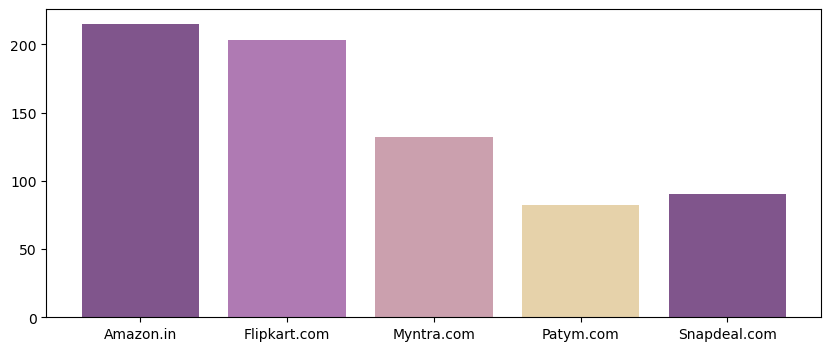

{'Amazon.in': 215,
 'Flipkart.com': 203,
 'Myntra.com': 132,
 'Patym.com': 82,
 'Snapdeal.com': 90}

In [66]:
count_col_data(df_comp,'Availability_Of_Payment_Options')

__Which website according to the users has the fastest delivery?__

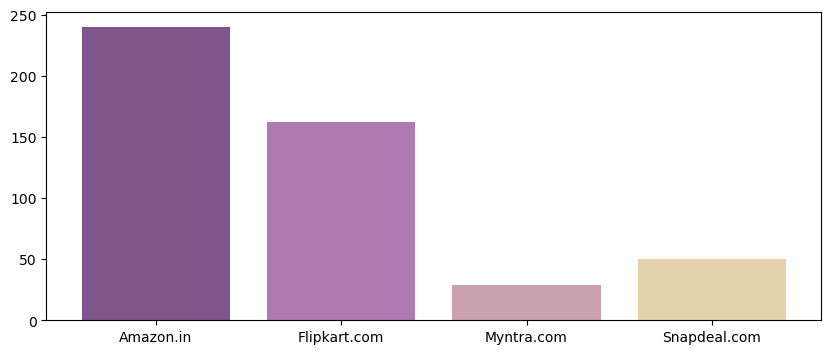

{'Amazon.in': 240, 'Flipkart.com': 162, 'Myntra.com': 29, 'Snapdeal.com': 50}

In [67]:
count_col_data(df_comp,'Fast_Delivery')

__Which website according to the users has privacy?__

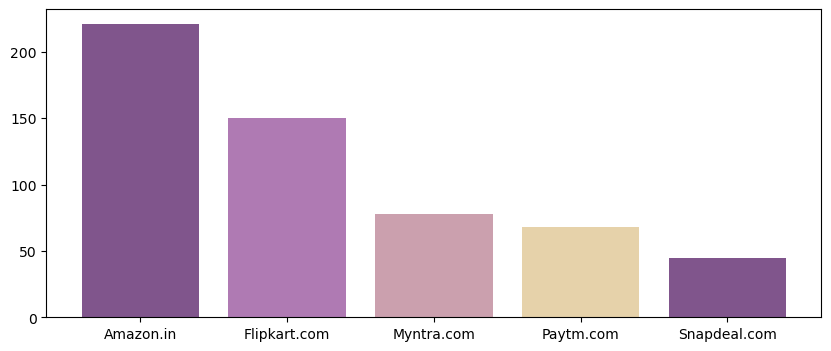

{'Amazon.in': 221,
 'Flipkart.com': 150,
 'Myntra.com': 78,
 'Paytm.com': 68,
 'Snapdeal.com': 45}

In [68]:
count_col_data(df_comp,'Privacy')

__Which website according to the users provides security?__

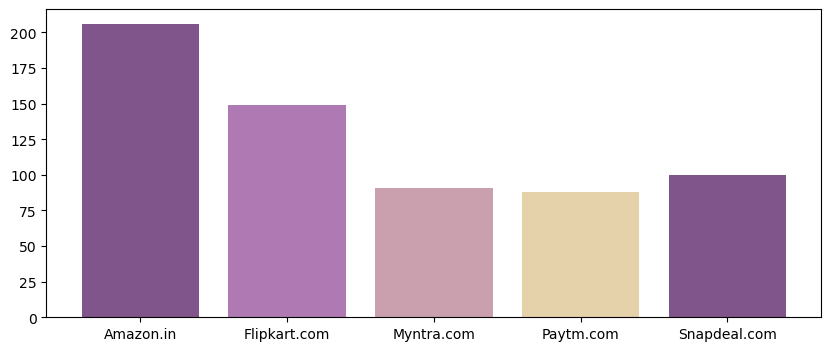

{'Amazon.in': 206,
 'Flipkart.com': 149,
 'Myntra.com': 91,
 'Paytm.com': 88,
 'Snapdeal.com': 100}

In [69]:
count_col_data(df_comp,'Security')

__Which website do most users Trust?__

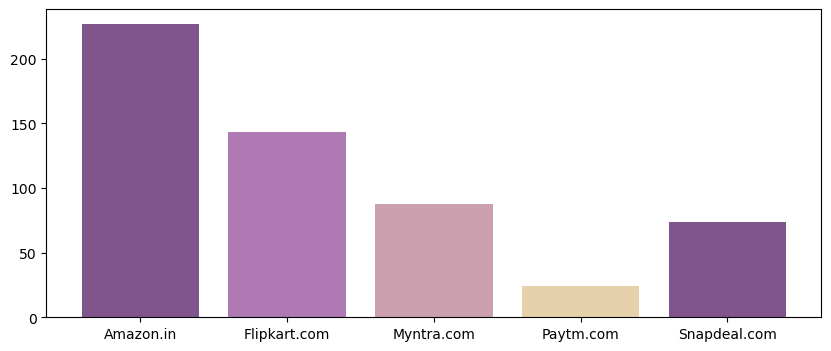

{'Amazon.in': 227,
 'Flipkart.com': 143,
 'Myntra.com': 88,
 'Paytm.com': 24,
 'Snapdeal.com': 74}

In [70]:
count_col_data(df_comp,'Trust')

__Which website according to the users provides better Online Assistance?__

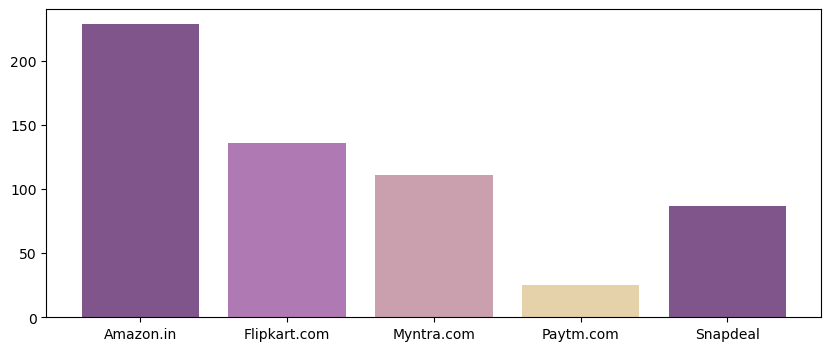

{'Amazon.in': 229,
 'Flipkart.com': 136,
 'Myntra.com': 111,
 'Paytm.com': 25,
 'Snapdeal': 87}

In [71]:
count_col_data(df_comp,'Online_Assistance')

__Which website according to the users is Efficient?__

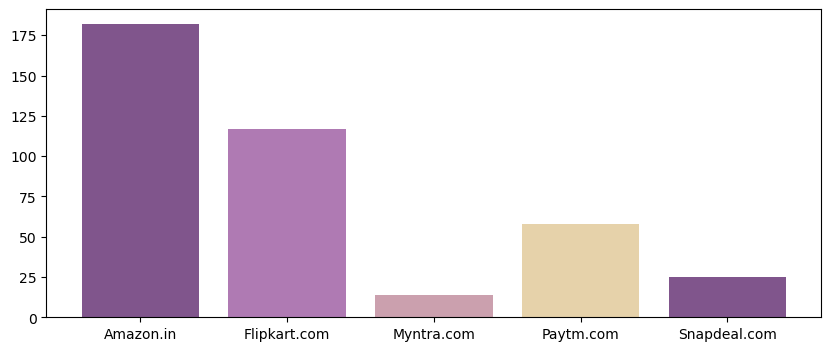

{'Amazon.in': 182,
 'Flipkart.com': 117,
 'Myntra.com': 14,
 'Paytm.com': 58,
 'Snapdeal.com': 25}

In [72]:
count_col_data(df_comp,'Efficient')

__Which website do users Recommend the most?__

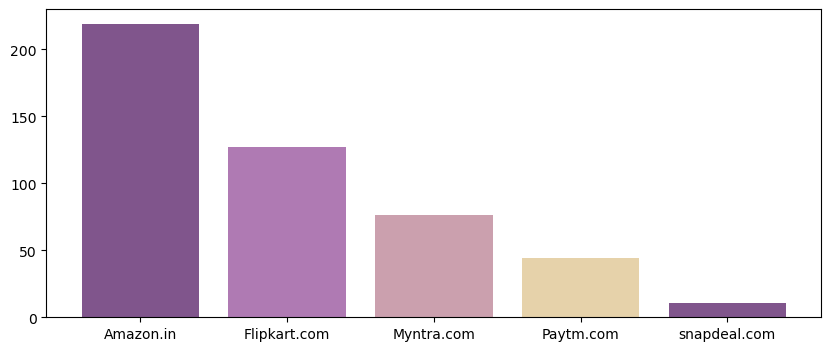

{'Amazon.in': 219,
 'Flipkart.com': 127,
 'Myntra.com': 76,
 'Paytm.com': 44,
 'snapdeal.com': 11}

In [73]:
count_col_data(df_comp,'Recommendation')

> <div class="alert alert-box alert-success">
    <b>IV(g). <i>Most Popular Online Stores (Scoring) <b><i>
    <a id='mpos_s'></a>

In [74]:
# creating a list of all the performance values obtained
tier = [{'All_Online_Retailers':{'Amazon.in': 269, 'Flipkart.com': 221, 'Myntra.com': 146, 'Paytm.com': 150, 'Snapdeal.com': 182}},
                     {'Visually_Appealing':{'Amazon.in': 227, 'Flipkart.com': 175, 'Myntra.com': 115, 'Paytm.com': 67, 'Snapdeal.com': 61}},
                    {'Easy_to_Use':{'Amazon.in': 249, 'Flipkart.com': 201, 'Myntra.com': 147, 'Paytm.com': 125, 'Snapdeal.com': 130}},                   
                    {'Reliable':{'Amazon.in': 227, 'Flipkart.com': 146, 'Myntra.com': 64, 'Paytm.com': 96, 'Snapdeal.com': 45}},
                     {'Variety_of_Products':{'Amazon.in': 220, 'Flipkart.com': 184, 'Myntra.com': 64, 'Paytm.com': 20, 'Snapdeal.com': 14}},
                     {'Complete_Product_Info':{'Amazon.in': 238, 'Flipkart.com': 194, 'Myntra.com': 64, 'Paytm.com': 59, 'Snapdeal.com': 59}},
                     {'Loading_Speed':{'Amazon.in': 249, 'Flipkart.com': 162, 'Myntra.com': 74, 'Paytm.com': 99, 'Snapdeal.com': 81}},
                     {'Reliability':{'Amazon.in': 227, 'Flipkart.com': 146, 'Myntra.com': 64, 'Paytm.com': 96, 'Snapdeal.com': 45}},
                     {'Trasaction_Speed':{'Amazon.com': 215, 'Flipkart.com': 158, 'Myntra.com': 79, 'Paytm.com': 107, 'Snapdeal': 29}},
                     {'Availability_Of_Payment_Options':{'Amazon.in': 215, 'Flipkart.com': 203, 'Myntra.com': 132, 'Patym.com': 82, 'Snapdeal.com': 90}},
                     {'Fast_Delivery':{'Amazon.in': 240, 'Flipkart.com': 162, 'Myntra.com': 29,'Paytm.com':0, 'Snapdeal.com': 50}},
                     {'Privacy':{'Amazon.in': 221, 'Flipkart.com': 150, 'Myntra.com': 78, 'Paytm.com': 68, 'Snapdeal.com': 45}},
                     {'Security':{'Amazon.in': 206, 'Flipkart.com': 149, 'Myntra.com': 91, 'Paytm.com': 88, 'Snapdeal.com': 100}},
                     {'Trust':{'Amazon.in': 227, 'Flipkart.com': 143, 'Myntra.com': 88, 'Paytm.com': 24, 'Snapdeal.com': 74}},
                     {'Online_Assistance':{'Amazon.in': 229, 'Flipkart.com': 136, 'Myntra.com': 111, 'Paytm.com': 25, 'Snapdeal': 87}},
                     {'Efficient':{'Amazon.in': 182, 'Flipkart.com': 117, 'Myntra.com': 14, 'Paytm.com': 58, 'Snapdeal.com': 25}},
                     {'Recommendation':{'Amazon.in': 219, 'Flipkart.com': 127, 'Myntra.com': 76, 'Paytm.com': 44, 'snapdeal.com': 11}}
       ]

# extracting values from the list to create a dataframe
temp = []
temp_keys = []
for i in tier:
    temp_keys.append(str(i.keys()).split("[")[1].strip("'])'"))
    for j in i.values():
        for k in j.values():
            temp.append(k)
            
# assigning the extracted values to variables
amazon = temp[::5]
flipkart = temp[1::5]
myntra = temp[2::5]
paytm = temp[3::5]
snapdeal = temp[4::5]

# creating a dataframe of all the obtained values
final = pd.DataFrame({'Amazon.in':amazon,'Flipkart.com':flipkart,'Myntra.com':myntra,'Paytm.com':paytm,'Snapdeal.com':snapdeal},index=temp_keys)
final.append(pd.Series(final.sum(),name='Total'))

,Amazon.in,Flipkart.com,Myntra.com,Paytm.com,Snapdeal.com
All_Online_Retailers,269,221,146,150,182
Visually_Appealing,227,175,115,67,61
Easy_to_Use,249,201,147,125,130
Reliable,227,146,64,96,45
Variety_of_Products,220,184,64,20,14
Complete_Product_Info,238,194,64,59,59
Loading_Speed,249,162,74,99,81
Reliability,227,146,64,96,45
Trasaction_Speed,215,158,79,107,29
Availability_Of_Payment_Options,215,203,132,82,90


The method used to determine the most 'popular' online store was by calculating the number of times a store was mentioned in a column.
- <u>For example</u>: `Trust` ► Amazon was mentioned 227 times, followed by Flipkart which was mentioned 143 times and so on...

    __The best online store accoring to users is:__ 

    🛒 Amazon.in [__3860__]

    👜 Flipkart.com [__2774__]

    💄 Myntra.com [__1436__]
    
    🅿 Paytm.com [__1208__]
    
    📦 Snapdeal.com [__1128__]

> <div class="alert alert-box alert-danger">
    <b>IV(h). <i>Most Unsatisfactory Online Stores (Visualizing) <b><i>
    <a id='muos_v'></a>

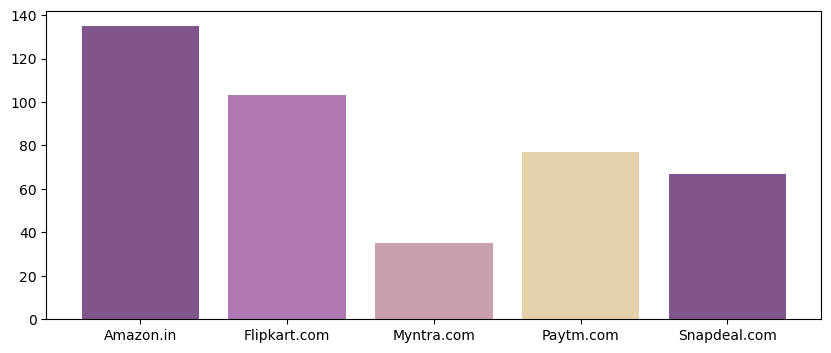

{'Amazon.in': 135,
 'Flipkart.com': 103,
 'Myntra.com': 35,
 'Paytm.com': 77,
 'Snapdeal.com': 67}

In [75]:
count_col_data(df_comp,'Longer_LogIn')

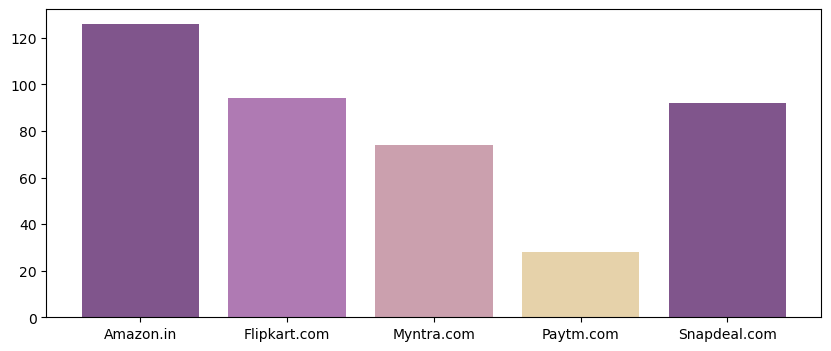

{'Amazon.in': 126,
 'Flipkart.com': 94,
 'Myntra.com': 74,
 'Paytm.com': 28,
 'Snapdeal.com': 92}

In [76]:
count_col_data(df_comp,'Longer_Display_Photos')

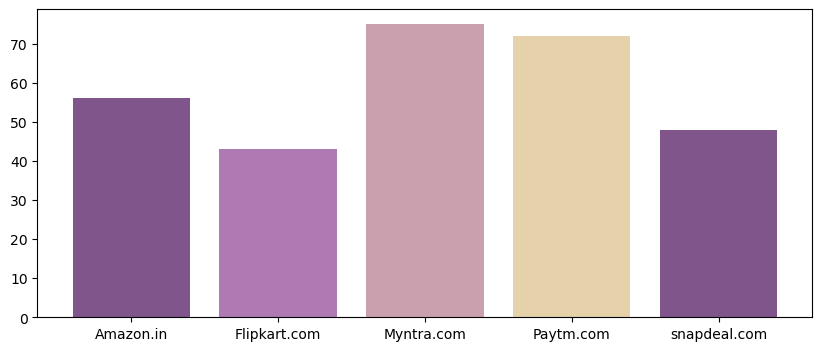

{'Amazon.in': 56,
 'Flipkart.com': 43,
 'Myntra.com': 75,
 'Paytm.com': 72,
 'snapdeal.com': 48}

In [77]:
count_col_data(df_comp,'Late_Price_Declaration')

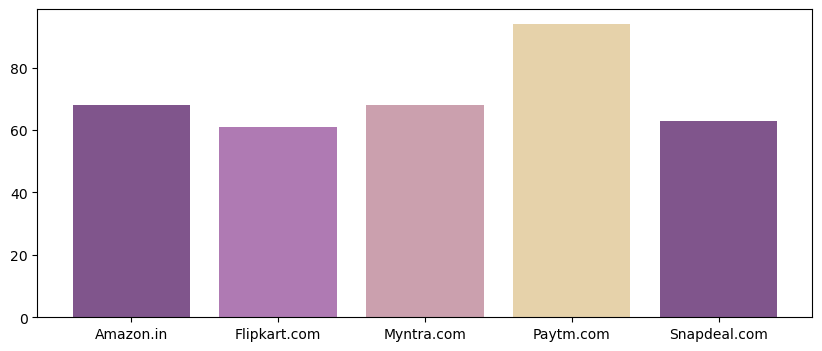

{'Amazon.in': 68,
 'Flipkart.com': 61,
 'Myntra.com': 68,
 'Paytm.com': 94,
 'Snapdeal.com': 63}

In [78]:
count_col_data(df_comp,'Longer_Loading_Time')

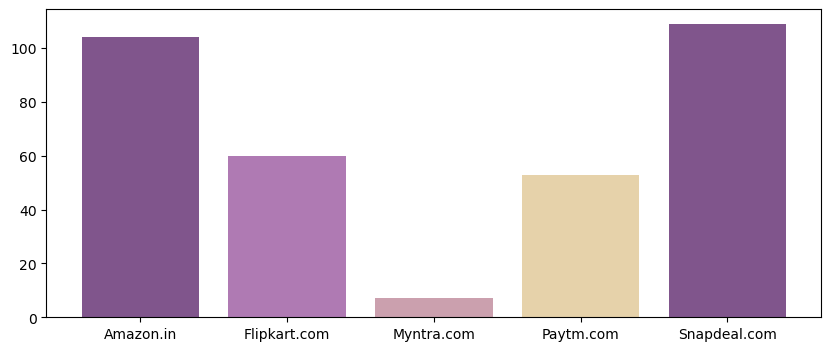

{'Amazon.in': 104,
 'Flipkart.com': 60,
 'Myntra.com': 7,
 'Paytm.com': 53,
 'Snapdeal.com': 109}

In [79]:
count_col_data(df_comp,'Limited_Payment')

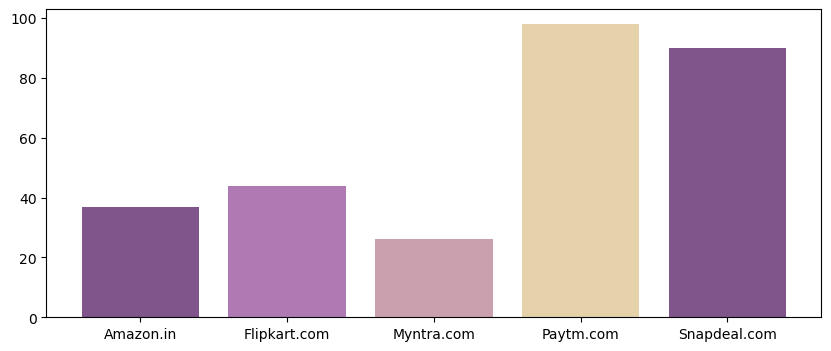

{'Amazon.in': 37,
 'Flipkart.com': 44,
 'Myntra.com': 26,
 'Paytm.com': 98,
 'Snapdeal.com': 90}

In [80]:
count_col_data(df_comp,'Longer_Delivery')

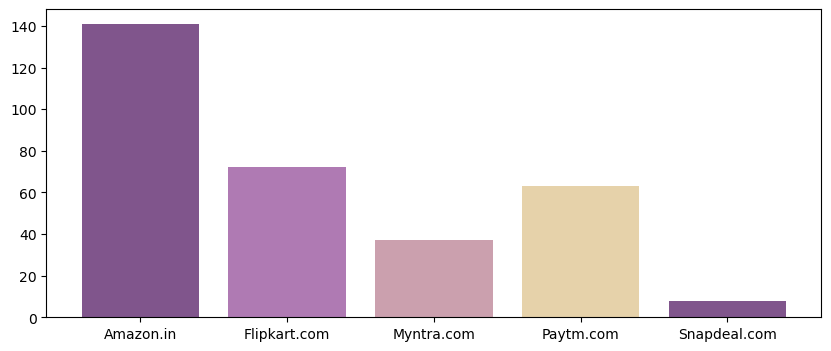

{'Amazon.in': 141,
 'Flipkart.com': 72,
 'Myntra.com': 37,
 'Paytm.com': 63,
 'Snapdeal.com': 8}

In [81]:
count_col_data(df_comp,'Change_in_UI')

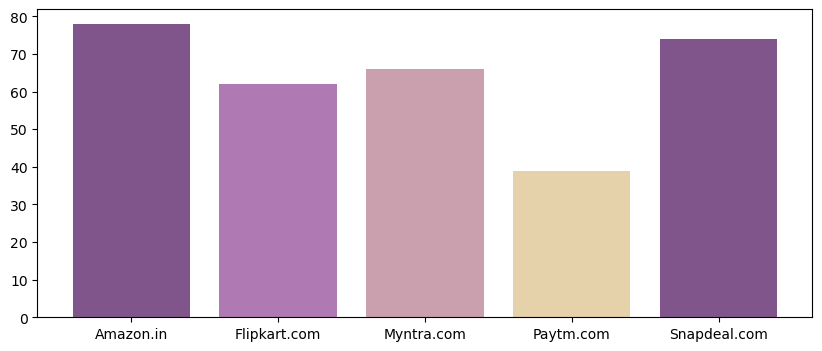

{'Amazon.in': 78,
 'Flipkart.com': 62,
 'Myntra.com': 66,
 'Paytm.com': 39,
 'Snapdeal.com': 74}

In [82]:
count_col_data(df_comp,'Page_Disruptions')

> <div class='alert alert-box alert-danger'>
    <b>IV(i).<i> Most Unsatisfactory Online Stores (Scoring)<b><i>
    <a id='muos_s'></a>

In [83]:
# creating a list of all the performance values obtained
tier = [{'Longer_LogIn':{'Amazon.in': 135, 'Flipkart.com': 103, 'Myntra.com': 35, 'Paytm.com': 77, 'Snapdeal.com': 67}},
                     {'Longer_Display_Photos':{'Amazon.in': 126, 'Flipkart.com': 94, 'Myntra.com': 74, 'Paytm.com': 28,'Snapdeal.com': 92}},
                    {'Late_Price_Declaration':{'Amazon.in': 56, 'Flipkart.com': 43, 'Myntra.com': 75, 'Paytm.com': 72, 'snapdeal.com': 48}},                   
                    {'Longer_Loading_Time':{'Amazon.in': 68, 'Flipkart.com': 61, 'Myntra.com': 68, 'Paytm.com': 94, 'Snapdeal.com': 63}},
                     {'Limited_Payment':{'Amazon.in': 104, 'Flipkart.com': 60, 'Myntra.com': 7, 'Paytm.com': 53, 'Snapdeal.com': 109}},
                     {'Longer_Delivery':{'Amazon.in': 37, 'Flipkart.com': 44, 'Myntra.com': 26, 'Paytm.com': 98, 'Snapdeal.com': 90}},
                     {'Change_in_UI':{'Amazon.in': 141, 'Flipkart.com': 72, 'Myntra.com': 37, 'Paytm.com': 63, 'Snapdeal.com': 8}},
                     {'Page_Disruptions':{'Amazon.in': 78, 'Flipkart.com': 62, 'Myntra.com': 66, 'Paytm.com': 39, 'Snapdeal.com': 74}},
       ]

# extracting values from the list to create a dataframe
temp = []
temp_keys = []
for i in tier:
    temp_keys.append(str(i.keys()).split("[")[1].strip("'])'"))
    for j in i.values():
        for k in j.values():
            temp.append(k)
            
# assigning the extracted values to variables
amazon = temp[::5]
flipkart = temp[1::5]
myntra = temp[2::5]
paytm = temp[3::5]
snapdeal = temp[4::5]

# creating a dataframe of all the obtained values
final_worst = pd.DataFrame({'Amazon.in':amazon,'Flipkart.com':flipkart,'Myntra.com':myntra,'Paytm.com':paytm,'Snapdeal.com':snapdeal},index=temp_keys)
final_worst.append(pd.Series(final_worst.sum(),name='Total'))

,Amazon.in,Flipkart.com,Myntra.com,Paytm.com,Snapdeal.com
Longer_LogIn,135,103,35,77,67
Longer_Display_Photos,126,94,74,28,92
Late_Price_Declaration,56,43,75,72,48
Longer_Loading_Time,68,61,68,94,63
Limited_Payment,104,60,7,53,109
Longer_Delivery,37,44,26,98,90
Change_in_UI,141,72,37,63,8
Page_Disruptions,78,62,66,39,74
Total,745,539,388,524,551


The method used to determine the most 'popular' online store was by calculating the number of times a store was mentioned in a column.
- <u>For example</u>: `Longer_Delivery` ► Paytm was mentioned 98 times, followed by Snapdeal which was mentioned 90 times and so on...

    __The most unsatisfactory E-tailer accoring to users is:__ 

    🛒 Amazon.in [__745__]

    📦 Snapdeal.com [__551__]

    👜 Flipkart.com [__539__]
    
    🅿 Paytm.com [__524__]
   
    💄 Myntra.com [__388__]
   

***
<div class='alert alert-box alert alert-info'>
    <b>V. EDA Conclusion & Remarks<b>
    <a id='conclusion'></a>

#### <u>Hedonistic values</u>
Columns analysed: `Adventure`,`Gratification_Shopping`,`Shopping_Fulfills_Roles`,`EShopping_Enhances_Social_Status`,`Value_For_Money_Spent` and `Enjoyment`

Observation:
Although, __almost all the users agree__ that the hedonistic values matter with regards to the purchase decision, __a slight clash can be seen__ in terms of sense of gratification, roles, social statuses and enjoyement.

- Gratification: where majority of females choose indifferent and majority of the males agree.
- Shopping Fulfills Roles: where also majority of females choose indifferent and majority of the males agree.
- EShopping Enhances Social Status: where both the genders find it indifferent.
- Enjoyment: where majority of the females choose strongly agree and majority of the males chose indifferent.

***
#### <u>Utilitarian values</u>
Columns analysed: `Info_On_Similar_Product`,`Complete_Product_Info`,`Convenience`,`Value_For_Money_Spent`,`Discounts` and `Savings`

Observation: Utilitarian values undoubtedly play a role in purchase decision and most importantly customer retention. This can be seen with the majority of the users __strongly agreeing__ to the utilitarian values playing a strong role in them formulating their purchase decision.

*** 
#### <u>Service Quality</u>
Columns analysed: `Empathy`,`Privacy`,`Responsiveness`,`Return_Replacement_Availability`,`Quality_Information`,`Ease_Of_Navigation`,
 `Easy_To_Understand`,`Friendly_UI`,`Order_Fulfilment_Trust` and `Satisfaction_On_Good_UI/UX`
 
Observation: There is a __general agreement__ with regards to the service qualities playing a role for a purchase decision and these are all service qualities that are important to drive more sales and to increase customer retention.

*** 
#### <u>Miscellaneous</u>
Columns analysed: `Gender`, `Age`, `City`,`Purchases_Annually`,`Internet_AccessPoint`, `Device`, `Screen_Size`, `OS`, `Browser`, `Introduction_To_Online_Store`, `Mode_Of_Access`, `Decision_Time`, `Preferred_Payment_Method` and `Frequency_of_Abandoning_Carts`

Observation:
1. __Gender__: Survey had `Males (67.3%)` and `Females (32.7%)`.
2. __Age__: Survey had `31-40 years(30.1%)`, `21-30 years(29.4%)`, `41-50 years(26%)`, `Less than 20 years(7.4%)`, and `51 years and above(7.1%)`.
3. __City__: Percentages of people from `Delhi (21.6%)`, `Greater Noida (16.0%)`, `Karnal (14.9%)`, `Bangalore (13.8%)`, `Noida (10.0%)`, `Solan (6.7%)`, `Moradabad (6.7%)`, `Gurgaon (4.5%)`, `Merrut (3.3%)`, `Ghaziabad (1.9%)`, `Bulandshahr (0.7%)`.
4. __Purchases_Annually__: `31-40 times (42.4%)`, `41 times and above (23.4%)`, `Less than 10 times (19.7%)`,`11-20 times (10.8%)`, `21-30 times (3.7%)`.
5. __Internet_AccessPoint__: `Dial-up (70.3%)`, `Wi-Fi (28.3%)`, `Mobile Internet (1.5%)`
6. __Device__: `Desktop (52.4%)`, `Smartphone (32.0%)`, `Tablet (11.2%)`, `Laptop (4.5%)`
7. __Screen_Size__: `Others (49.8%)`, `4.7 inches (36.8%)`, `5.5 inches (10.8%)`, `5 inches (2.6%)`
8. __OS__: `Window/windows Mobile (45.4%)`, `IOS/Mac (31.6%)`, `Android (23.0%)`
9. __Browser__: `Google chrome (80.3%)`, `Safari (14.9%)`, `Opera (3.0%)`, `Mozilla Firefox (1.9%)`
10. __Introduction_To_Online_Store__: `Search Engine (85.5%)`, `Content Marketing (7.4%)`, `Display Adverts (7.1%)`
11. __Mode_Of_Access__: `Search Engine (32.3%)`, `Via application (32.0%)`, `Direct URL (26.0%)`, `E-mail (6.7%)`,
       `Social Media (3.0%)`
12. __Decision_Time__:`6-10 mins (45.7%)`, `more than 15 mins (26.4%)`, `11-15 mins (17.1%)`, `1-5 mins (5.6%)`, `Less than 1 min (5.2%)`
13. __Preferred_Payment_Method__: `E-wallets (Paytm, Freecharge etc.) (55.0%)`, `Credit/Debit cards (28.3%)`, `Cash on delivery (CoD) (16.7%)`
14. __Frequency_of_Abandoning_Carts__: `Sometimes (63.6%)`, `Very frequently (17.8%)`, `Never (13.0%)`, `Frequently (5.6%)`

***
#### <u>Best Online Store</u>
The best online store accoring to users is: 

🛒 Amazon.in [__3860__]

👜 Flipkart.com [__2774__]

💄 Myntra.com [__1436__]
    
🅿 Paytm.com [__1208__]
    
📦 Snapdeal.com [__1128__]
    
***
#### <u>Most unsatisfactory Online Store</u>
The most unsatisfactory online store accoring to users is:

🛒 Amazon.in [__745__]

📦 Snapdeal.com [__551__]

👜 Flipkart.com [__539__]
    
🅿 Paytm.com [__524__]
   
💄 Myntra.com [__388__]
***
### <u>Questions</u> 

__Q. Does the descision time differ between the two genders?__

- Yes, the decision taking time is more in the Female demographic, with more than 80 females taking more than 15 minutes to make a purchase decision and majority of the Males take 6-10 minutes to make a purchase decision.

__Q. Does the decision time influence the purchases the users make?__

- Yes, there is an __increase in the number of purchases when the decision time is 1-5 mins and 6-10 mins__. Most males take __1-5 mins to make a purchase decision__ and majority of the Females take 6-10 mins. Males also take less than 1 min to make a purchase decision, However, they make purchases upto 21-30 times a year.

__Q. Which mode of payment and OS is more popular amongst the users?__

- Credit/Debit cards and Window/windows Mobile are popular amongst Females.
- E-wallets (Paytm, Freecharge etc.) and IOS/Mac are more popular amongst Males.

__Q. Does loading speed affect the number of purchases users make annually?__
- Users who __disagree__ have the most amount of purchases annually. However, users who __agree__ that loading speed affects the purchase decision have __less annual purchases compared to those who disagree__.
- Since the users who agree that loading speed affects the purchase decision are more in number (227 both strongly agree & agree), __we can safely say that loading speed does affect the number of purchases made annually.__

__Q. Which device is used to make the most purchases annually?__

- 🥇 Smartphone

- 🥈 Laptop

- 🥉 Desktop

***   
#### __Q. Why do users still choose Amazon as the best online store despite them finding it unsatisfactory?__

- Well, in spite of the fact that users believe Amazon is unsatisfactory. It scores the best in terms of __service quality__ (_Transaction_Speed_, _Online_Assistance_, _Fast_Delivery_ etc...), __system quality__ (_Loading_Speed_, _Availability_of_Payment_Options_,_Reliability_ etc..), __information quality__ (_Complete_Product_Info_,_Security_ etc..), __trust__ and __net benefit__ (_Efficient_,  _Variety_of_Products_,_Fast_Delivery_ etc..). 
- From my analysis of this data, it can be seen that hedonistic values vary depending on the gender so it is difficult to cater to the hedonistic values of both the genders (all users).So, the faster and better way to approach this would be to "score" more in terms of utilitarian values, as users can be seen to __generally agree__ to all the utilitarian values playing a role in their purchase decisions. This can assure more customer retention and as well as guarantee more sales. 

*** 
<div class='alert alert-info'>
    <b>VI. Feature Engineering<b>  
        <a id='fe'></a>

In [84]:
#Resolving ambiguities of the columns

#Changing 42 times and above to 41 times and above
df['6 How many times you have made an online purchase in the past 1 year?'].replace('42 times and above','41 times and above',
                                                                                 inplace=True)

# changing the averages to numerical formats
dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
df['Average times made an online purchase']=df['6 How many times you have made an online purchase in the past 1 year?'].replace(dict)

# changing the averages to numerical formats
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['5 Since How Long You are Shopping Online ?'].replace(dict)

#Changing Greater noida to noida
df['3 Which city do you shop online from?'].replace({'Greater Noida':'Noida'},inplace=True)

*** 
<div class='alert alert-info'>
    <b>VII. Model Building<b>  
        <a id='mb'></a>

In [94]:
df = data.join(df_comp)

In [97]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Purchases_Annually',
       'Internet_AccessPoint', 'Device', 'Screen_Size', 'OS', 'Browser',
       'Introduction_To_Online_Store', 'Mode_Of_Access', 'Decision_Time',
       'Preferred_Payment_Method', 'Frequency_of_Abandoning_Carts',
       'Easy_To_Understand', 'Info_On_Similar_Product',
       'Complete_Seller_and_Product_Info', 'Clear_Relevant_Info',
       'Ease_Of_Navigation', 'Loading_Speed_Q', 'Friendly_UI',
       'Convenient_Payment_Methods', 'Order_Fulfilment_Trust', 'Empathy',
       'Privacy_Q', 'Responsiveness', 'Discounts', 'Enjoyment', 'Convenience',
       'Return_Replacement_Availability', 'Loyalty_Programs_Access',
       'Quality_Information', 'Satisfaction_On_Good_UI/UX', 'Net_Benefit',
       'User_Satisfaction and Trust', 'Variety', 'Complete_Product_Info_Q',
       'Savings', 'Patronizing', 'Adventure',
       'EShopping_Enhances_Social_Status', 'Gratification_Shopping',
       'Shopping_Fulfills_Roles', 'Value_For_Mo

In [98]:
x = df.drop('Recommendation',axis=1)
y = df['Recommendation']

In [99]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#using ordinal encoder for independent features
cat_feats = [i for i in x if x[i].dtypes=='O']
for i in cat_feats:
    x[i]=OrdinalEncoder().fit_transform(x[i].values.reshape(-1,1))
    
# Using label encoder for Label Column
y=LabelEncoder().fit_transform(y)

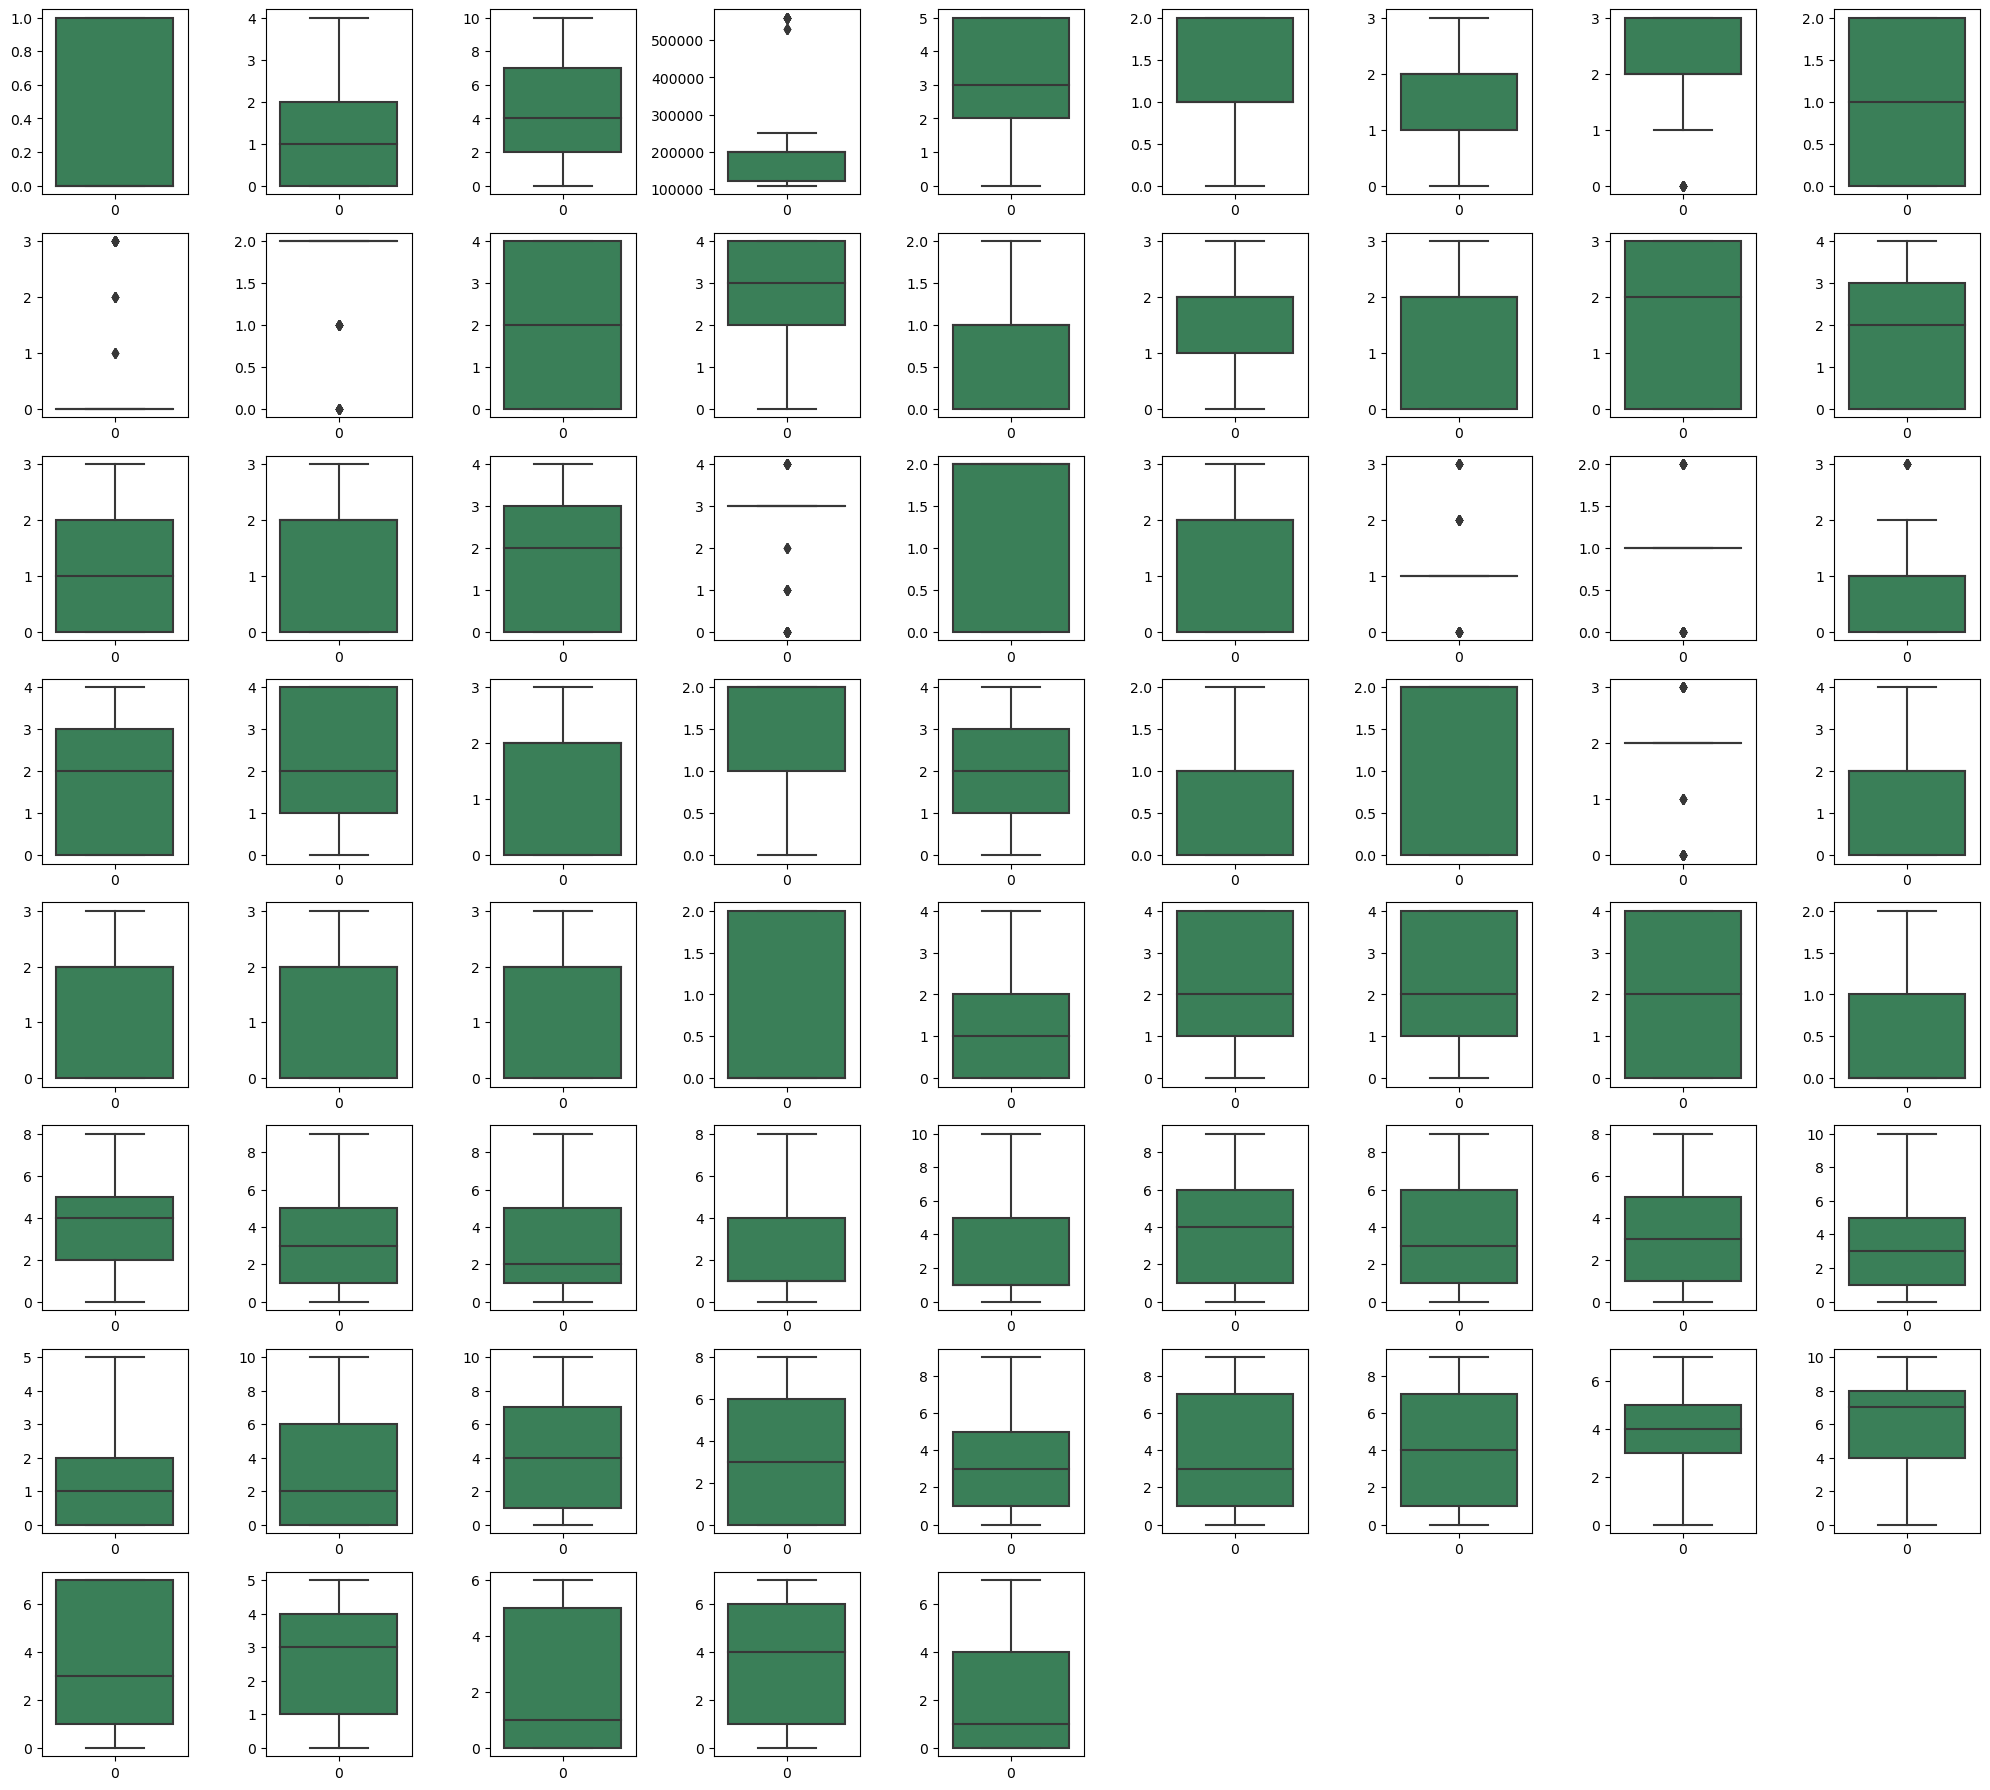

In [100]:
# outliers
collist = x.columns.values
ncols = 9
nrows = 9

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=x[collist[i]],orient='v',color='seagreen')
    plt.tight_layout()

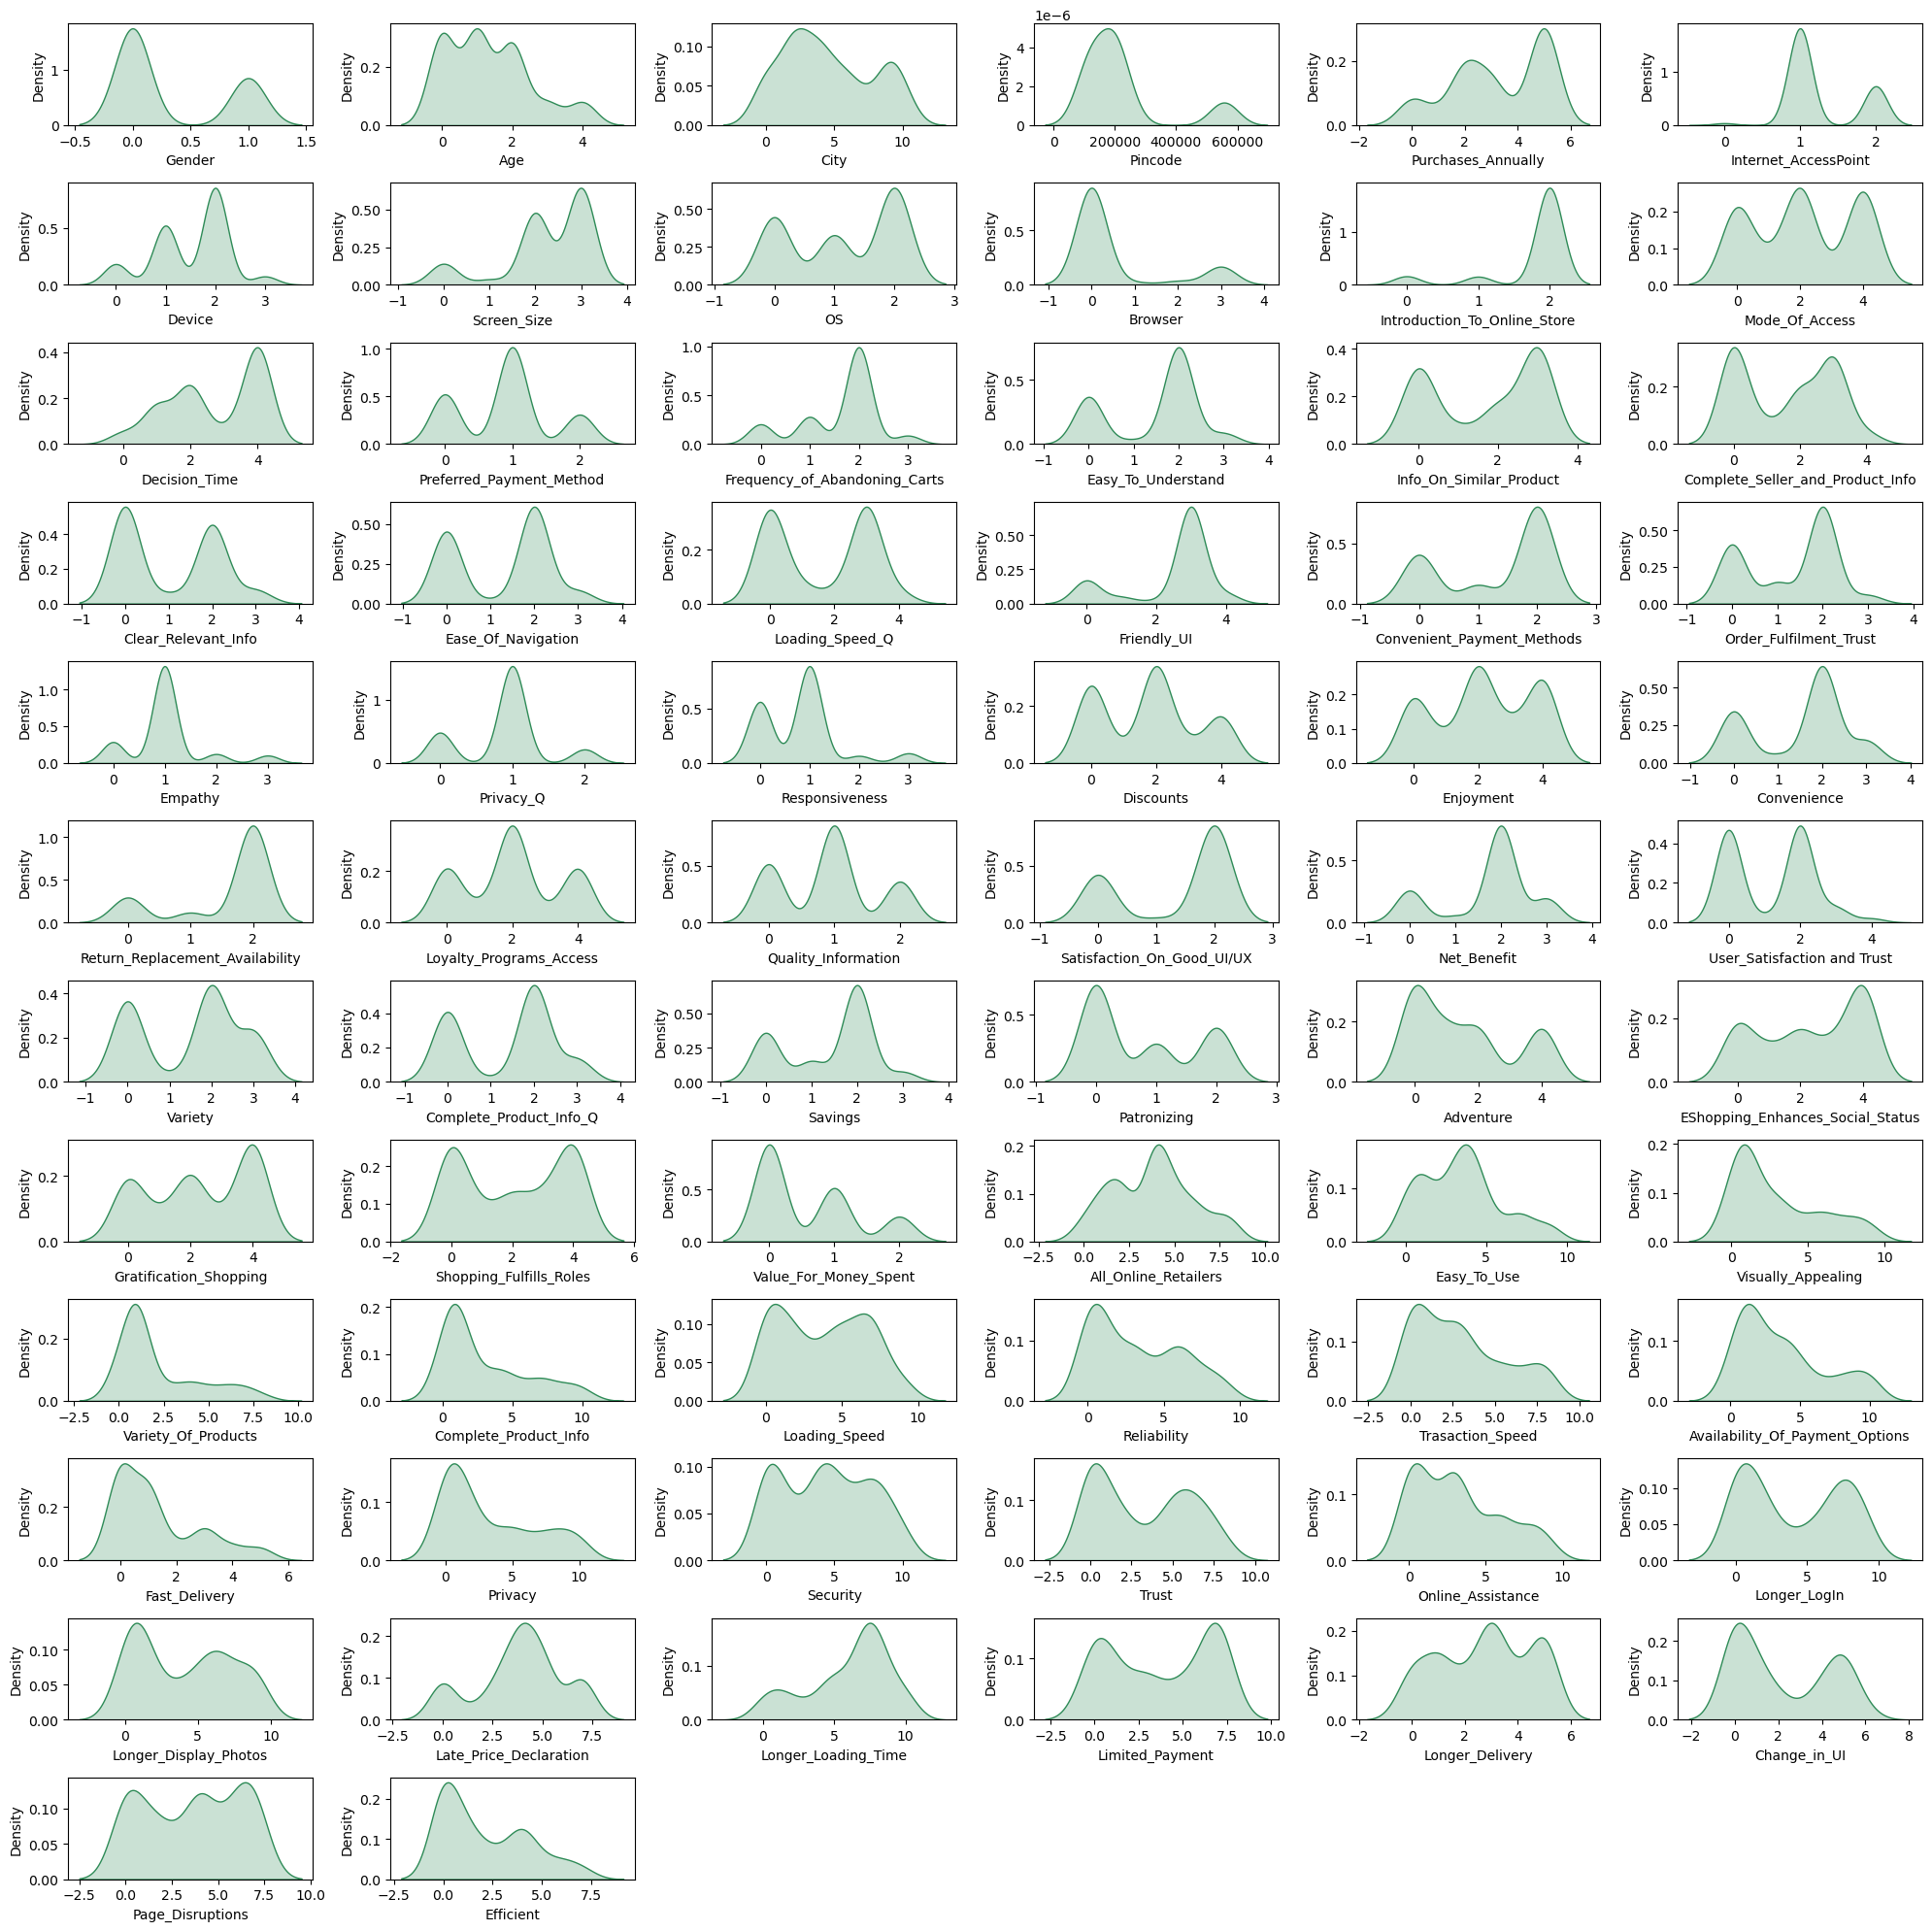

In [101]:
# skewness
collist = x.columns.values
ncols = 6
nrows = 12

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.kdeplot(data=x[collist[i]],fill=True,color='seagreen')
    plt.tight_layout()

In [102]:
from scipy.stats import zscore
z = np.abs(zscore(x))
x_new = x[(z<3).all(axis=1)]
print (f"Percentage of data lost:",(x.shape[0]-x_new.shape[0])/x.shape[0]*100)

Percentage of data lost: 7.434944237918216


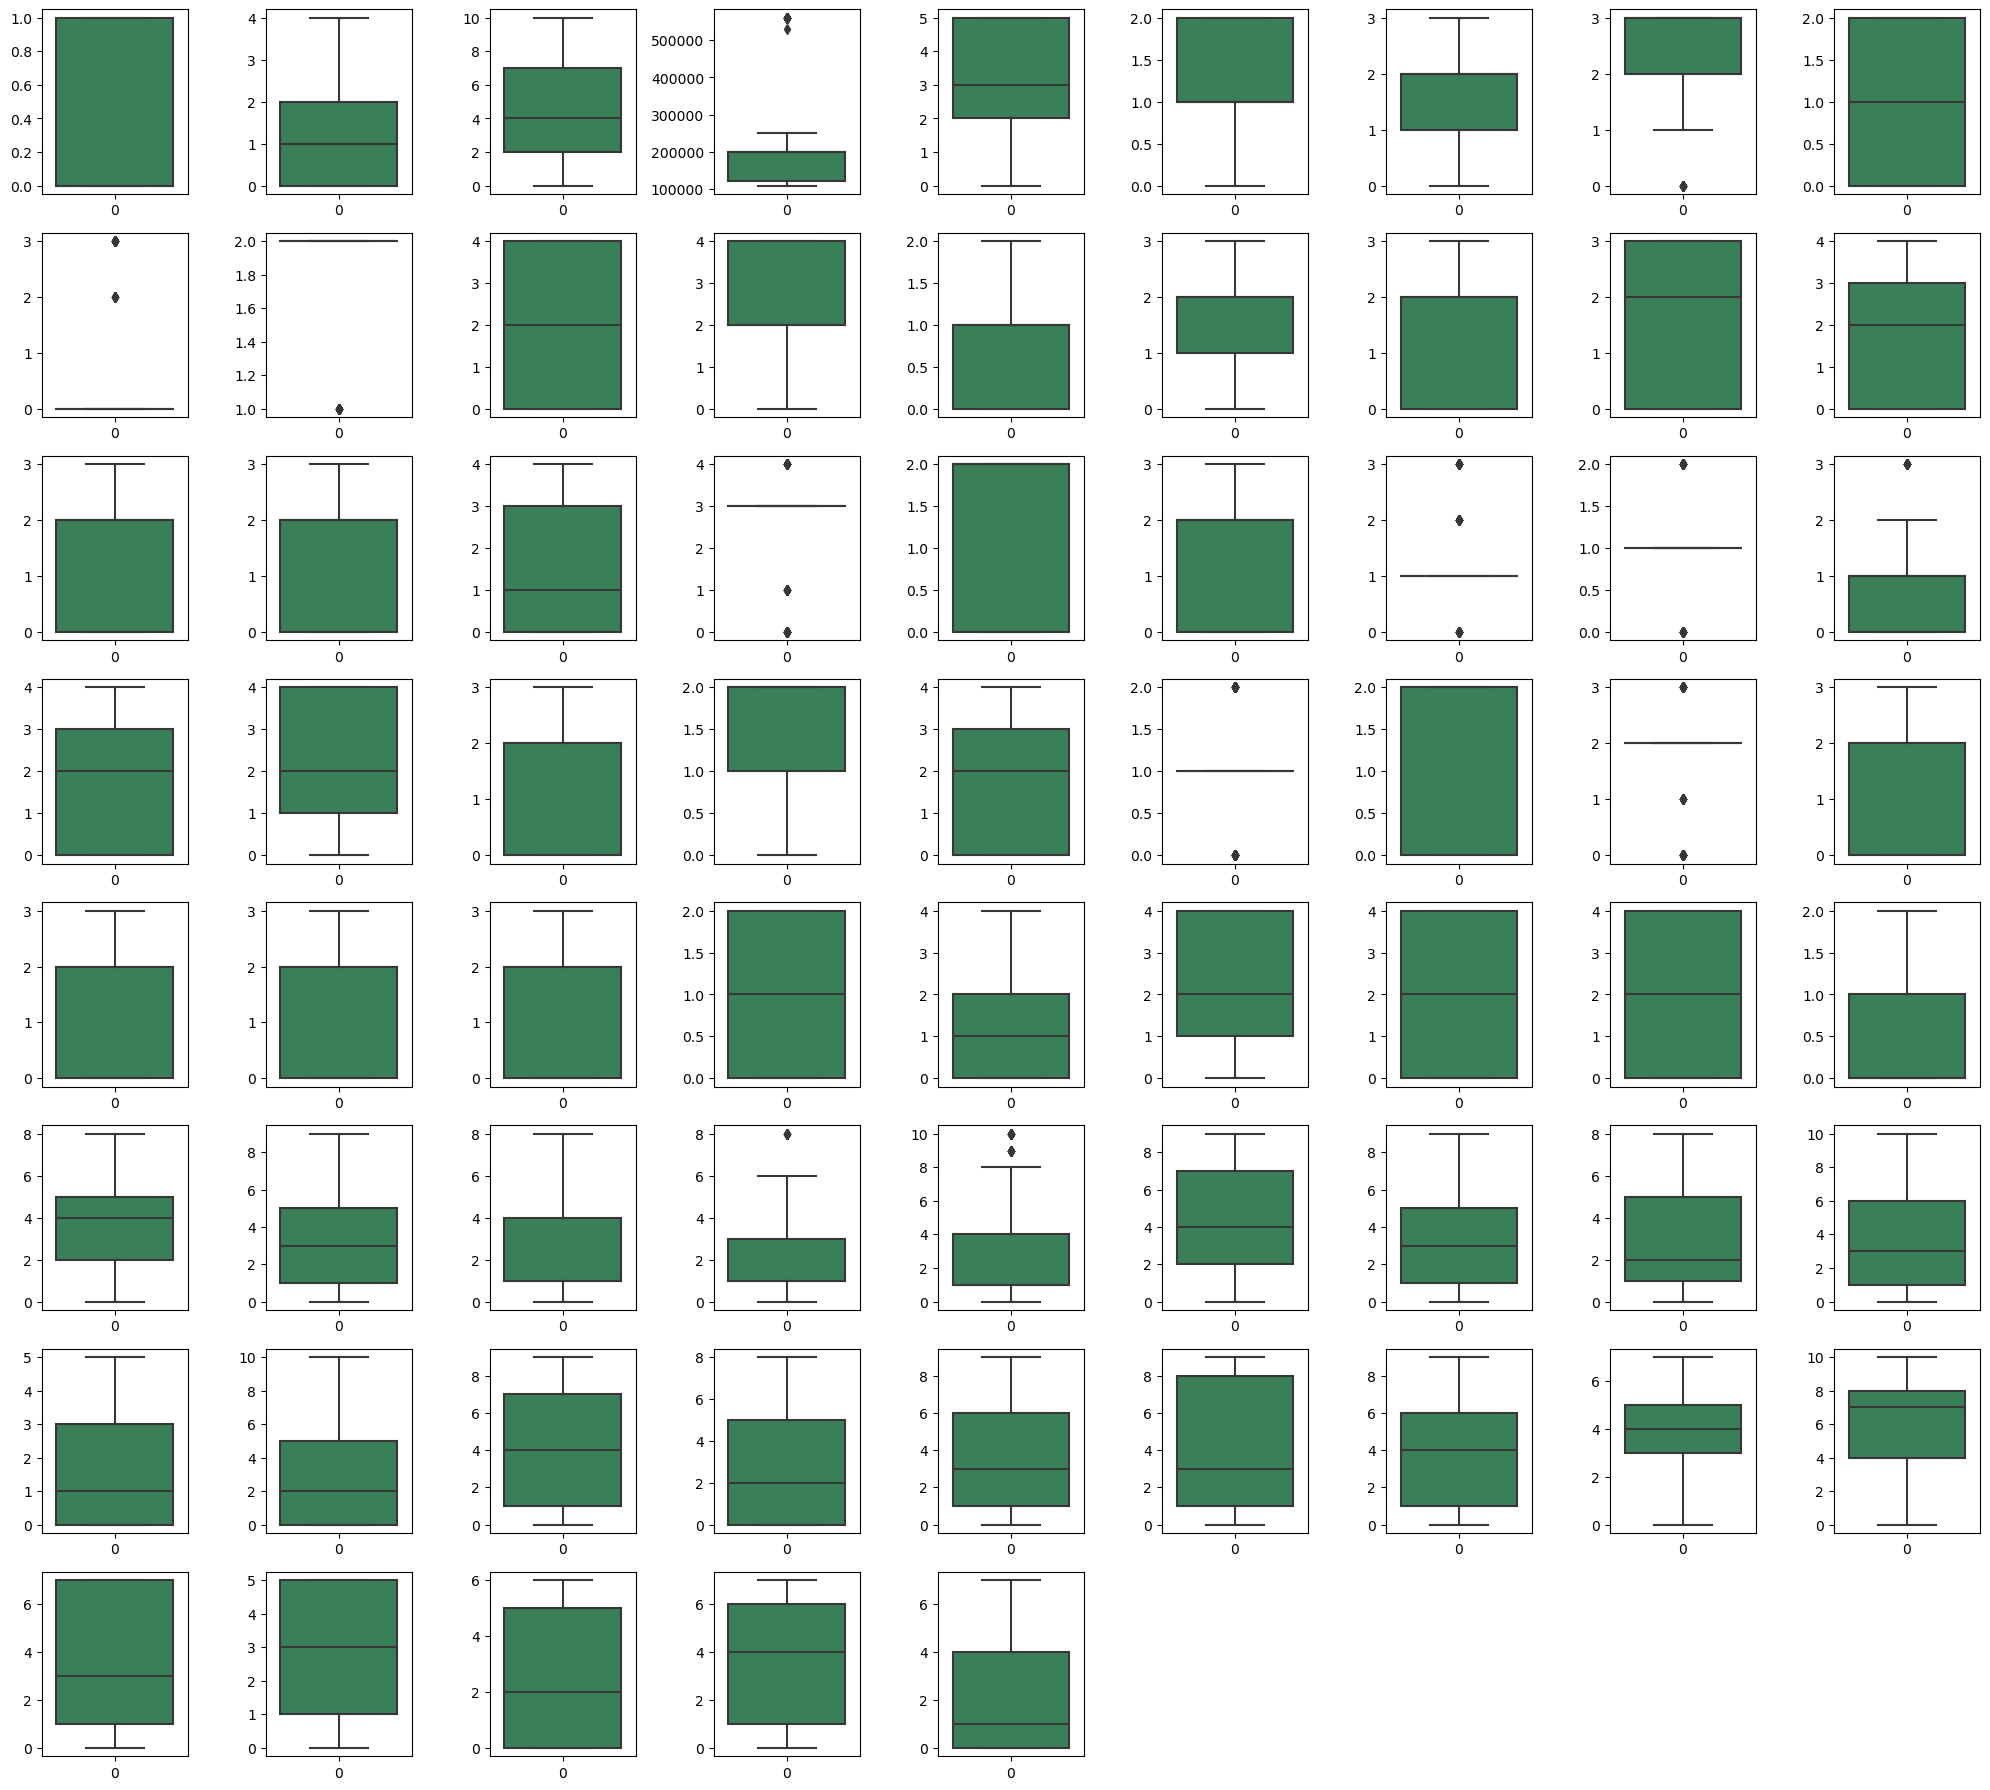

In [103]:
# outliers
collist = x_new.columns.values
ncols = 9
nrows = 9

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=x_new[collist[i]],orient='v',color='seagreen')
    plt.tight_layout()

In [112]:
# checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_new = pd.DataFrame()
vif_new['Variables'] = df.columns[:-1]
vif_new['VIF Factor'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_new[vif_new['VIF Factor']>40]

,Variables,VIF Factor
9,Browser,inf
10,Introduction_To_Online_Store,inf
11,Mode_Of_Access,inf
12,Decision_Time,inf
13,Preferred_Payment_Method,inf
14,Frequency_of_Abandoning_Carts,inf
15,Easy_To_Understand,inf
16,Info_On_Similar_Product,inf
17,Complete_Seller_and_Product_Info,inf
18,Clear_Relevant_Info,inf


In [113]:
from sklearn.preprocessing import StandardScaler, power_transform, MinMaxScaler
xd=MinMaxScaler().fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)
x = power_transform(x,method='yeo-johnson')

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [118]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_sample(x_train,y_train)

In [119]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(yc_test,yc_pred):
    lb=LabelBinarizer()
    yc_test_new=lb.fit_transform(yc_test)
    yc_pred_new=lb.fit_transform(yc_pred)
    return round(roc_auc_score(yc_test_new,yc_pred_new)*100,2)

In [121]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model_c, score_c, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model_c.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score_c.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)
    
#     shows the confusion matrix
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_para = {'n_estimators':range(50,300,50),'loss':['log_loss','exponential'],'criterion':['friedman_mse','squared_error','mse']}
gs_gbc = GridSearchCV(gbc,gbc_para,cv=3,scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'criterion': 'friedman_mse', 'loss': 'log_loss', 'n_estimators': 50}

Model: GradientBoostingClassifier
Accuracy Score: 100.0
f1 Score: 100.0
CV Score: 1.0
ROC_AUC Score: 100.0


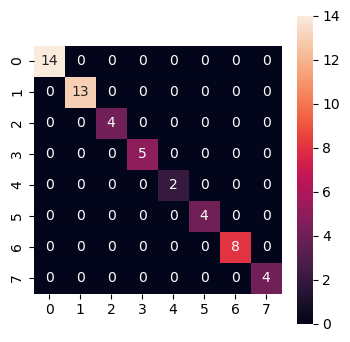

In [127]:
gbc = GradientBoostingClassifier(n_estimators=50,loss='log_loss',criterion='friedman_mse')
classification_model(gbc)

In [141]:
# Feature Importance

def feature_importance_graph(model):
#     creating dataframe of the features and their importances
    featuress = pd.DataFrame({'Feature': df.columns[:-1], 'Feature importance': model.feature_importances_})
    featuress.sort_values(by='Feature importance',ascending=False)[:-36]

#     plotting the above dataframe
    plt.figure(figsize = (10,12))
    featuress_plot = sns.barplot(x='Feature importance',y='Feature',data=featuress,color='#C6EBC5')
    plt.show()

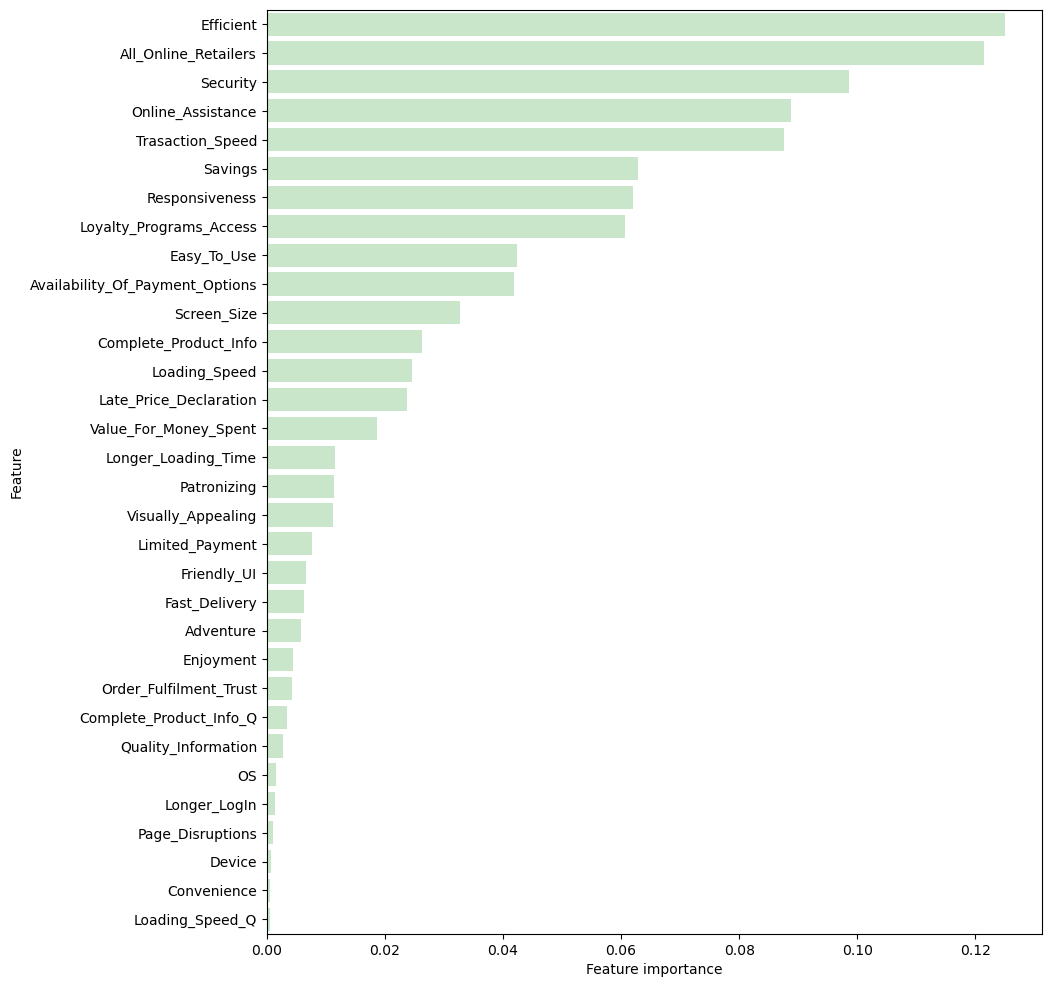

In [142]:
feature_importance_graph(gbc)

***
<div class='alert alert-info'>
    <b>VIII. Saving the Model<b>
        <a id='save'></a>

In [143]:
import joblib
joblib.dump(gbc,'GBC_CustomerRetention.pkl')

['GBC_CustomerRetention.pkl']